# 1. PDF load

In [ ]:
# import fitz

# def classify_page(page_num, total_pages) :
#     """
#     페이지 번호를 기반으로 intro, body, end를 분류하는 함수.
#     """
#     if page_num < 2 :
#         return "intro"
#     elif page_num >= total_pages - 2 :
#         return "end"
#     else :
#         return "body"

# # def get_image_area_ratio(page, img_rect) :
# #     """
# #     개별 이미지의 크기를 전체 페이지 면적 대비 비율로 반환.
# #     """
# #     page_width, page_height = page.rect.width, page.rect.height
# #     page_area = page_width * page_height

# #     x0, y0, x1, y1 = img_rect
# #     img_width = x1 - x0
# #     img_height = y1 - y0
# #     img_area = img_width * img_height

# #     return img_area / page_area  # 전체 페이지 대비 이미지 크기 비율

# # def get_total_image_area_ratio(page, images) :
# #     """
# #     페이지에서 감지된 모든 이미지의 총 면적 비율을 계산.
# #     """
# #     total_ratio = sum(get_image_area_ratio(page, img_rect) for img_rect in images)
# #     return total_ratio

# def extract_page(pdf_path, image_threshold = 0.4) :
#     """
#     PDF에서 텍스트 및 이미지 정보를 추출.
#     페이지에서 인식된 이미지의 총 면적이 전체 페이지 면적의 40% 이상일 때만 이미지 내용을 해석.
#     """
#     doc = fitz.open(pdf_path)
#     total_pages = len(doc)
#     page_data = []

#     for page_num in range(total_pages) :
#         page = doc[page_num]

#         # 텍스트 추출
#         text = page.get_text("text")

#         # 이미지 추출
#         images = page.get_images(full=True)
#         image_data = []
#         img_rects = []
#         for img in images :
#             xref = img[0]
#             img_rects_page = page.get_image_rects(xref)
#             if img_rects_page:
#                 img_rects.append(img_rects_page[0])  # 이미지 위치 저장

#         # 페이지 내 이미지 총 면적 계산
#         total_img_ratio = get_total_image_area_ratio(page, img_rects)

#         # 이미지 분석 여부 결정
#         process_images = total_img_ratio >= image_threshold

#         for img_rect in img_rects :
#             x0, y0, x1, y1 = img_rect
#             image_entry = {"x": x0, "y": y0, "width": x1 - x0, "height": y1 - y0}

#             if process_images :
#                 image_entry["processed"] = True  # 이미지 내용 해석 수행
#             else :
#                 image_entry["processed"] = False  # 무시됨

#             image_data.append(image_entry)

#         # 페이지 유형 결정
#         section = classify_page(page_num, total_pages)

#         # 페이지 데이터 저장
#         page_data.append({
#             "page": page_num + 1,
#             "text": text,
#             "images": image_data,
#             "section": section,
#             "total_image_ratio": round(total_img_ratio, 2),
#             "image_analysis": process_images
#         })
        
#     return page_data, doc.metadata

In [1]:
import fitz  # PyMuPDF
from PIL import Image
import io

def extract_pdf_content(pdf_path):
    pdf_doc = fitz.open(pdf_path)
    pages = []

    for page_number in range(len(pdf_doc)):
        page = pdf_doc[page_number]
        page_text = page.get_text()
        image_entries = []

        images = page.get_images(full=True)
        for img in images:
            xref = img[0]
            base_image = pdf_doc.extract_image(xref)
            image_bytes = base_image["image"]
            pil_image = Image.open(io.BytesIO(image_bytes))

            # 이미지 위치 추출
            rects = page.get_image_rects(xref)
            for rect in rects:
                image_entries.append({
                    "x0": rect.x0,
                    "y0": rect.y0,
                    "x1": rect.x1,
                    "y1": rect.y1,
                    "image": pil_image
                })

        # 페이지 데이터 구성
        page_data = {
            "page": page_number + 1,
            "text": page_text,
            "images": image_entries
        }

        pages.append(page_data)

    pdf_doc.close()
    return pages

In [2]:
pdf_path = '../../data/pdf/presentation_agent.pdf'
pdf_data = extract_pdf_content(pdf_path)



# pages, metadata = extract_page(pdf_path)
# pages

In [3]:
pdf_data[3]

{'page': 4,
 'text': 'Wordcloud\nNetworkx\n01. 개요\n기획 배경\n“발표 준비”라는 키워드의 블로그, 뉴스, 카페, 지식인 등 에서\n제목 및 내용을 크롤링하여 수집\n발표는 우리 삶에 얼마나 밀접해 있을까?\n',
 'images': [{'x0': -19.18781089782715,
   'y0': 292.3575134277344,
   'x1': 696.5653076171875,
   'y1': 659.5574951171875,
   'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=790x405>},
  {'x0': 713.5635986328125,
   'y0': 214.59759521484375,
   'x1': 1427.88232421875,
   'y1': 736.7100830078125,
   'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1019x745>},
  {'x0': 414.5634460449219,
   'y0': 451.3218994140625,
   'x1': 587.8134765625,
   'y1': 587.0718994140625,
   'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=656x512>},
  {'x0': 182.5324249267578,
   'y0': 383.59954833984375,
   'x1': 355.78240966796875,
   'y1': 519.3495483398438,
   'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=656x512>},
  {'x0': -4.785785675048828,
   'y0': 456.60546875,
   'x1': 168.46421813964844,
   'y1': 592.3

# 2. 이미지 해석(GPT-4o)

In [4]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from PIL import Image
import base64
import io
from dotenv import load_dotenv

load_dotenv()

def pil_image_to_base64(image: Image.Image) -> str:
    """PIL 이미지를 base64로 인코딩"""
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def classify_image_type(image: Image.Image, llm: ChatOpenAI) -> str:
    """
    이미지 분류 요청을 GPT-4o에 보내고 결과 반환.
    """
    img_b64 = pil_image_to_base64(image)
    data_url = f"data:image/png;base64,{img_b64}"

    prompt = (
        "다음 이미지를 아래 세 가지 중 하나로 분류하세요:\n"
        "1. 그래프/도표\n"
        "2. 로고\n"
        "3. 그외\n"
        "반드시 위 중 하나의 항목만 정확히 출력하세요."
    )

    messages = [
        SystemMessage(content="당신은 이미지 분류 전문 AI 에이전트입니다."),
        HumanMessage(content=[
            {"type": "text", "text": prompt},
            {"type": "image_url", "image_url": {"url": data_url}}
        ])
    ]

    response = llm.invoke(messages)
    label = response.content.strip()
    return label if label in ["그래프/도표", "로고", "그외"] else "그외"

def analyze_pdf_images(pdf_data: list) -> list:
    """
    각 페이지의 이미지에 대해 GPT-4o로 분류 결과를 추가
    """
    llm = ChatOpenAI(model="gpt-4o", temperature=0)

    for page in pdf_data:
        for image in page["images"]:
            image_type = classify_image_type(image["image"], llm)
            image["image_type"] = image_type

    return pdf_data

In [5]:
result = analyze_pdf_images(pdf_data)
result

[{'page': 1,
  'text': 'Presentation Agent\n저희 발표 안합니다!\n정재식, 이진규\nㅈ소 기업\n',
  'images': []},
 {'page': 2,
  'text': '프로젝트 개요\n기획 배경\n프로젝트 소개\n01\nCONTENT\n프로젝트 기획\n자원 및 기술\n시스템 구조\n작업 흐름\n02\n프로젝트 방향성\n발전 방안\n03\n',
  'images': []},
 {'page': 3, 'text': '프로젝트 개요\n프로젝트 개요\n01\n', 'images': []},
 {'page': 4,
  'text': 'Wordcloud\nNetworkx\n01. 개요\n기획 배경\n“발표 준비”라는 키워드의 블로그, 뉴스, 카페, 지식인 등 에서\n제목 및 내용을 크롤링하여 수집\n발표는 우리 삶에 얼마나 밀접해 있을까?\n',
  'images': [{'x0': -19.18781089782715,
    'y0': 292.3575134277344,
    'x1': 696.5653076171875,
    'y1': 659.5574951171875,
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=790x405>,
    'image_type': '그외'},
   {'x0': 713.5635986328125,
    'y0': 214.59759521484375,
    'x1': 1427.88232421875,
    'y1': 736.7100830078125,
    'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1019x745>,
    'image_type': '그래프/도표'},
   {'x0': 414.5634460449219,
    'y0': 451.3218994140625,
    'x1': 587.8134765625,
    'y1': 587.071899414062

Page 1:
Page 2:
Page 3:
Page 4:
  Image 1 - Type: 그외


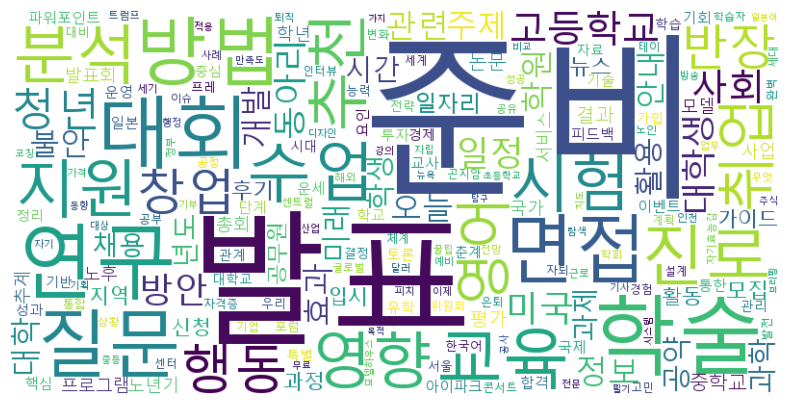

  Image 2 - Type: 그래프/도표


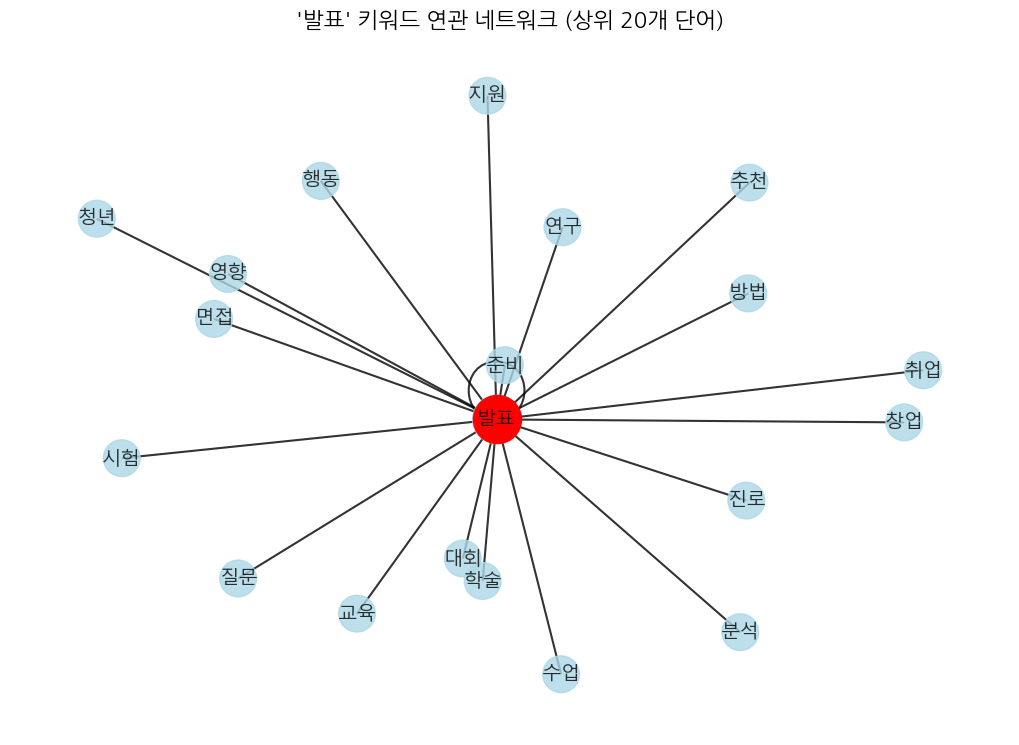

  Image 3 - Type: 로고


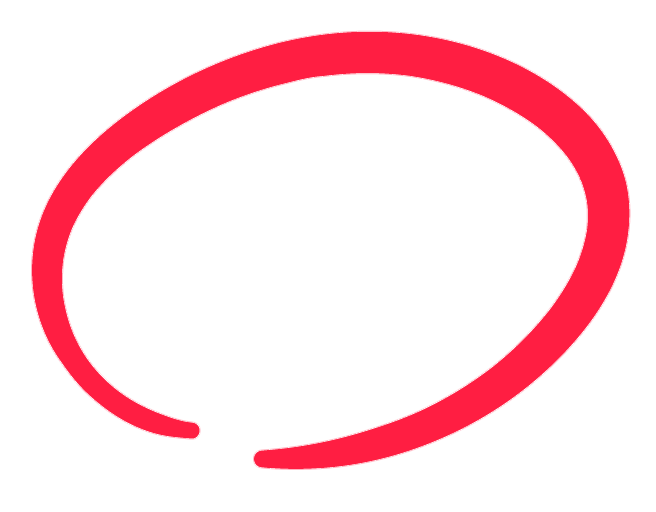

  Image 4 - Type: 로고


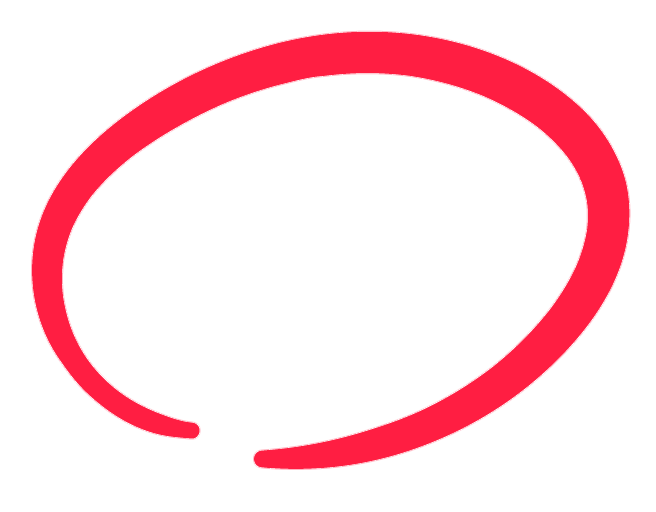

  Image 5 - Type: 로고


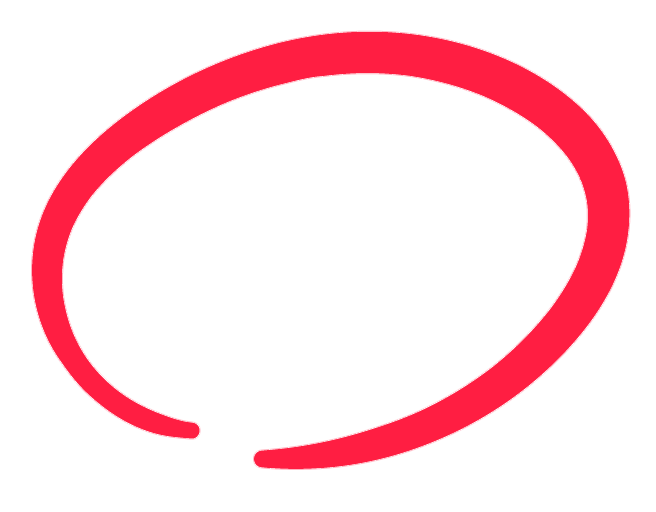

Page 5:
  Image 1 - Type: 그외


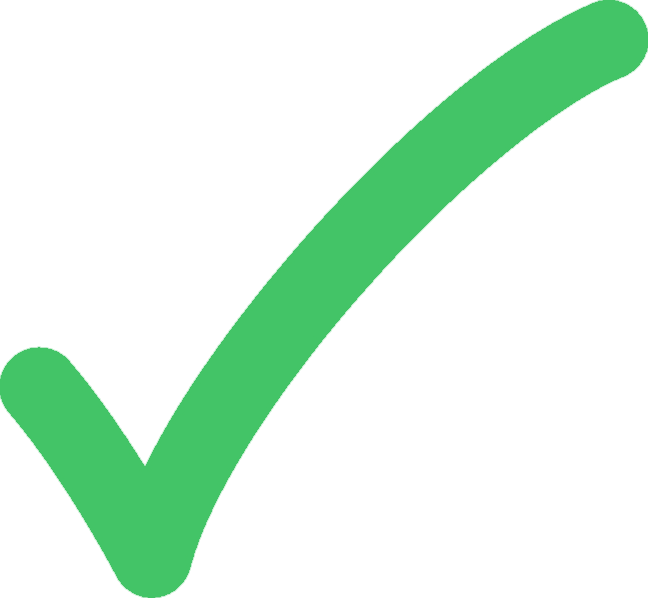

  Image 2 - Type: 그외


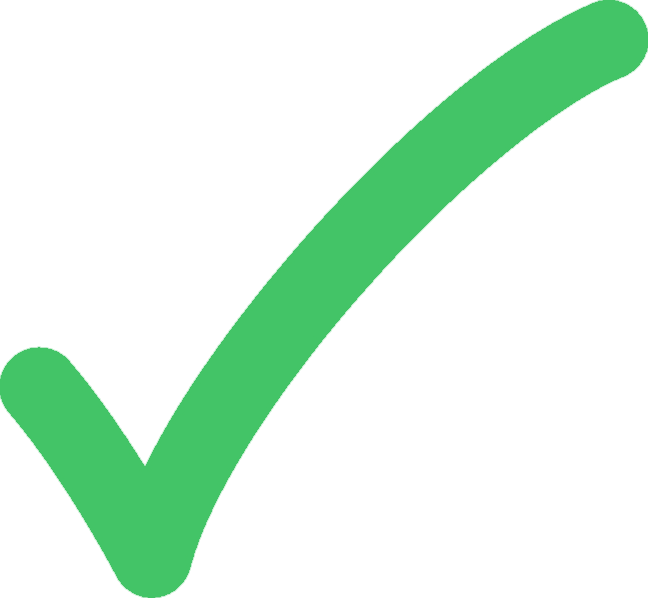

  Image 3 - Type: 그외


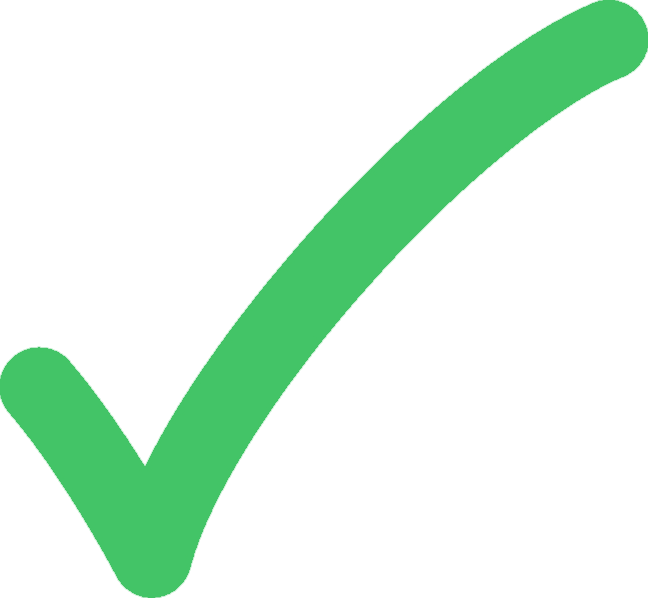

  Image 4 - Type: 그외


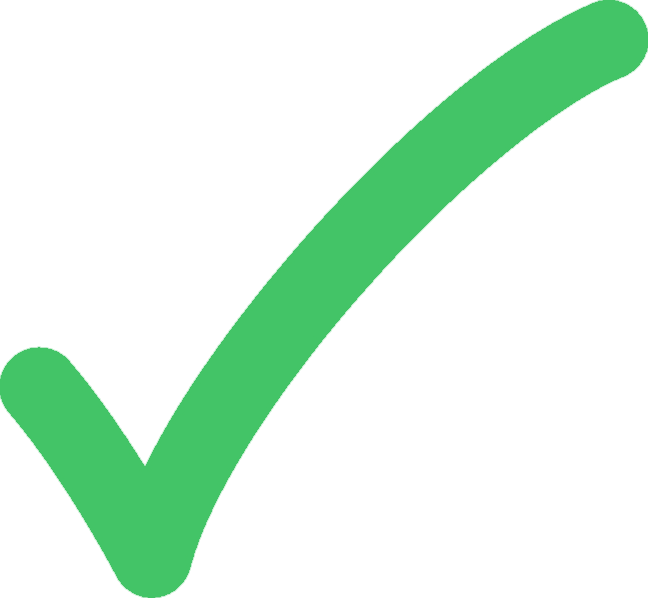

Page 6:
  Image 1 - Type: 그외


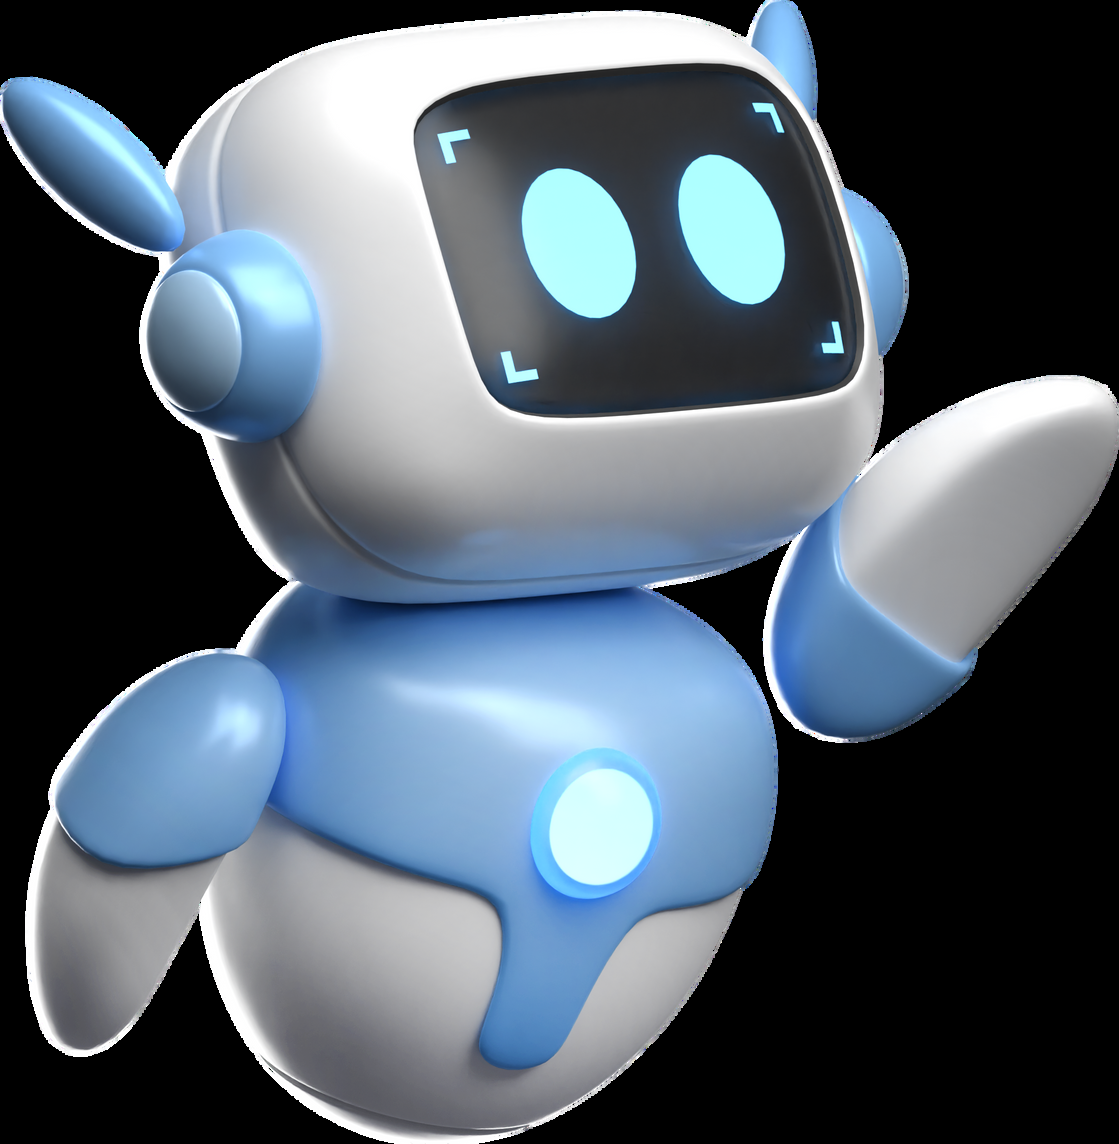

Page 7:
Page 8:
  Image 1 - Type: 로고


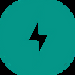

  Image 2 - Type: 로고


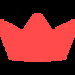

  Image 3 - Type: 로고


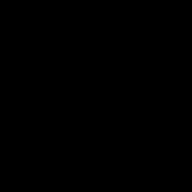

  Image 4 - Type: 로고


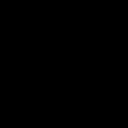

  Image 5 - Type: 로고


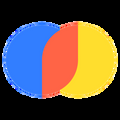

  Image 6 - Type: 로고


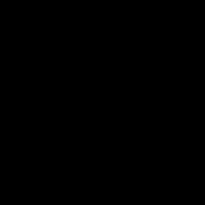

  Image 7 - Type: 로고


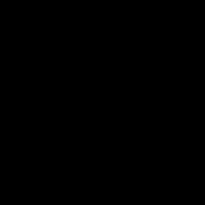

  Image 8 - Type: 로고


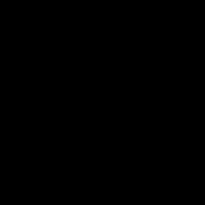

  Image 9 - Type: 로고


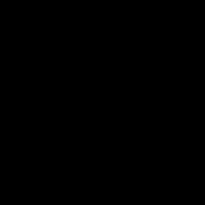

  Image 10 - Type: 그외


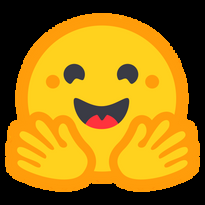

Page 9:
  Image 1 - Type: 그외


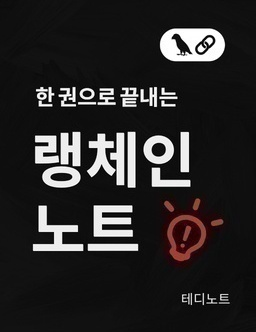

  Image 2 - Type: 그외


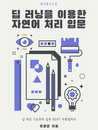

  Image 3 - Type: 그외


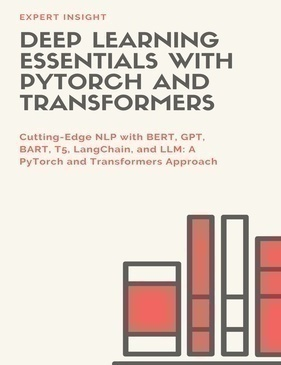

Page 10:
  Image 1 - Type: 그외


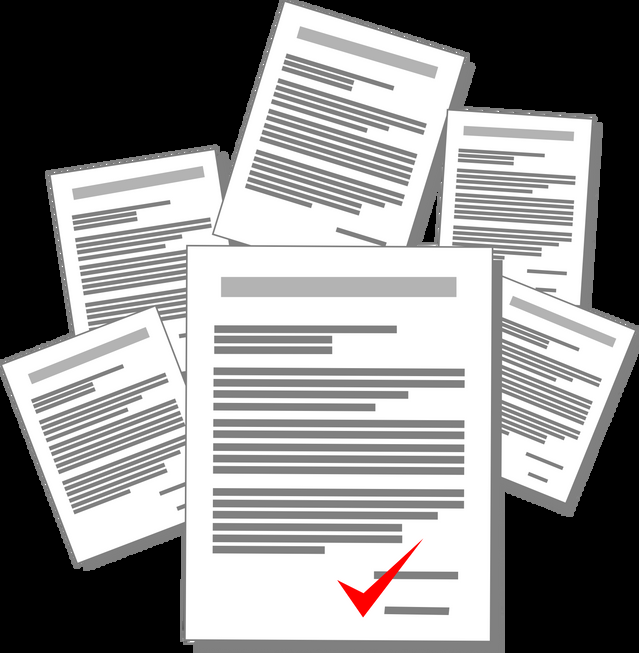

  Image 2 - Type: 로고


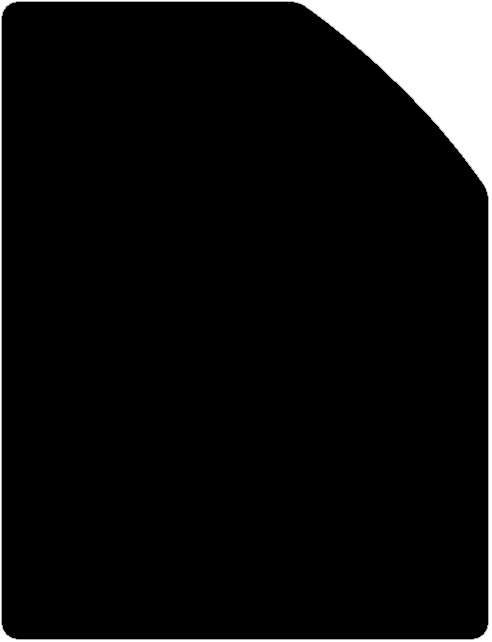

  Image 3 - Type: 로고


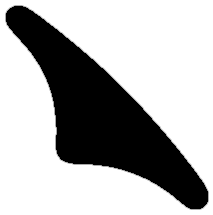

  Image 4 - Type: 그외


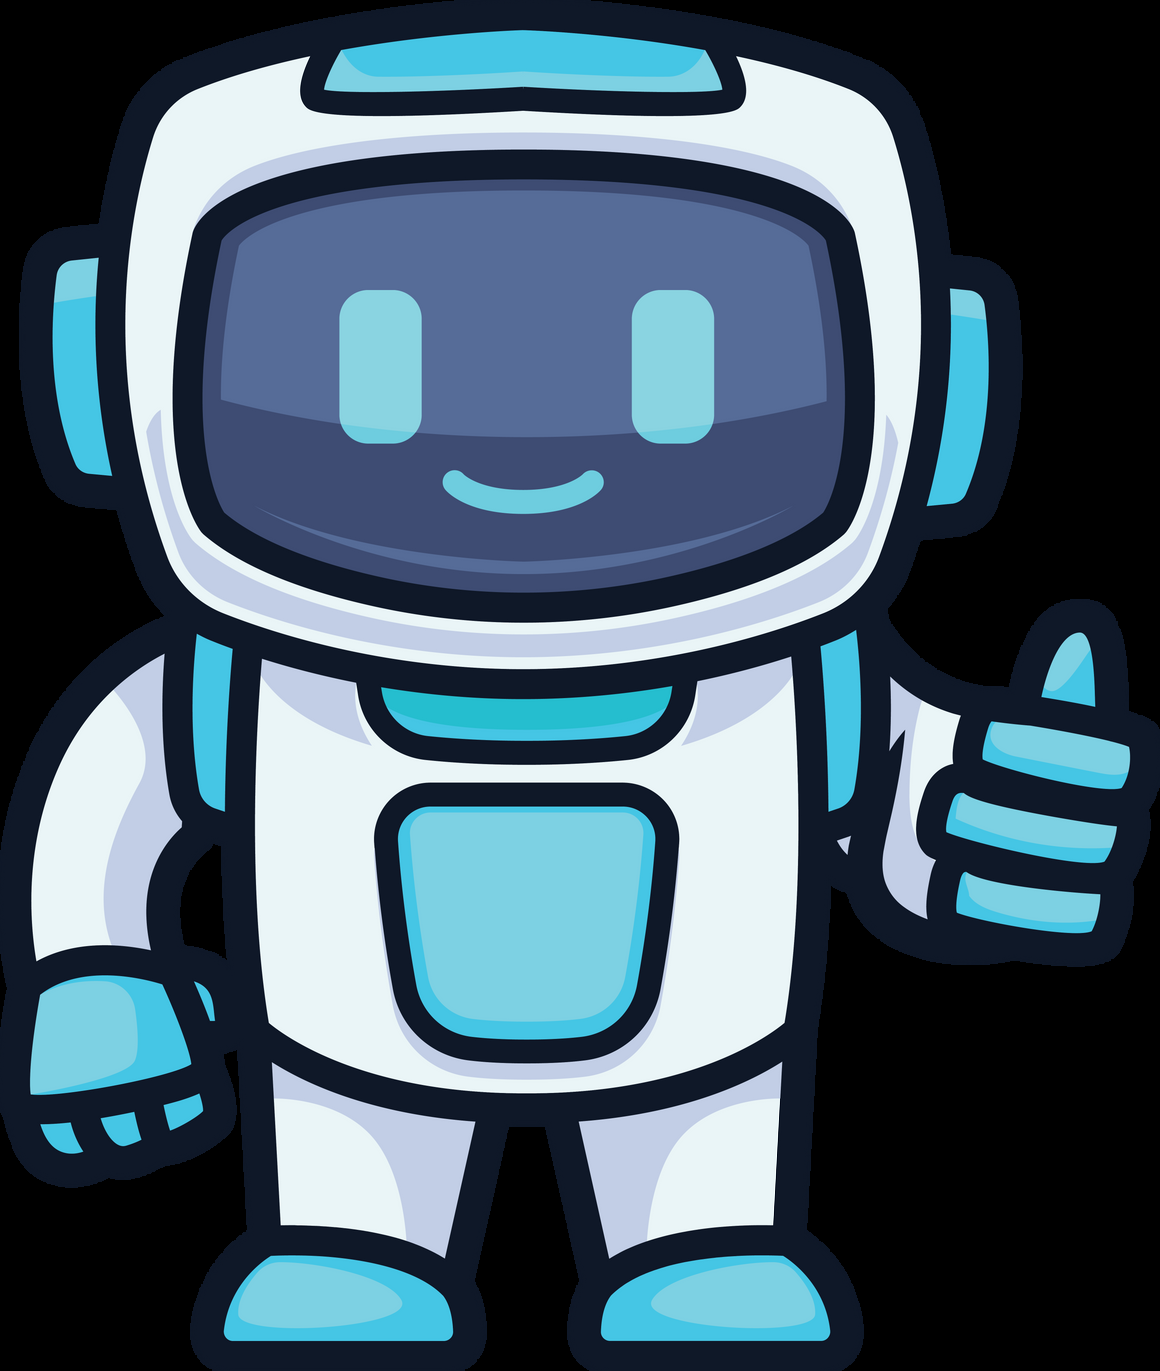

Page 11:
  Image 1 - Type: 그외


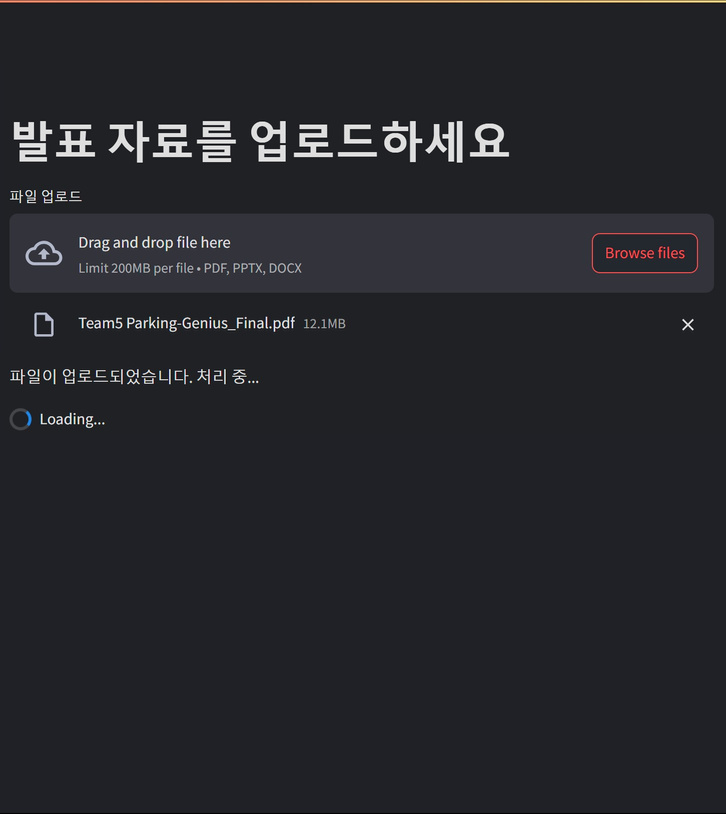

  Image 2 - Type: 그외


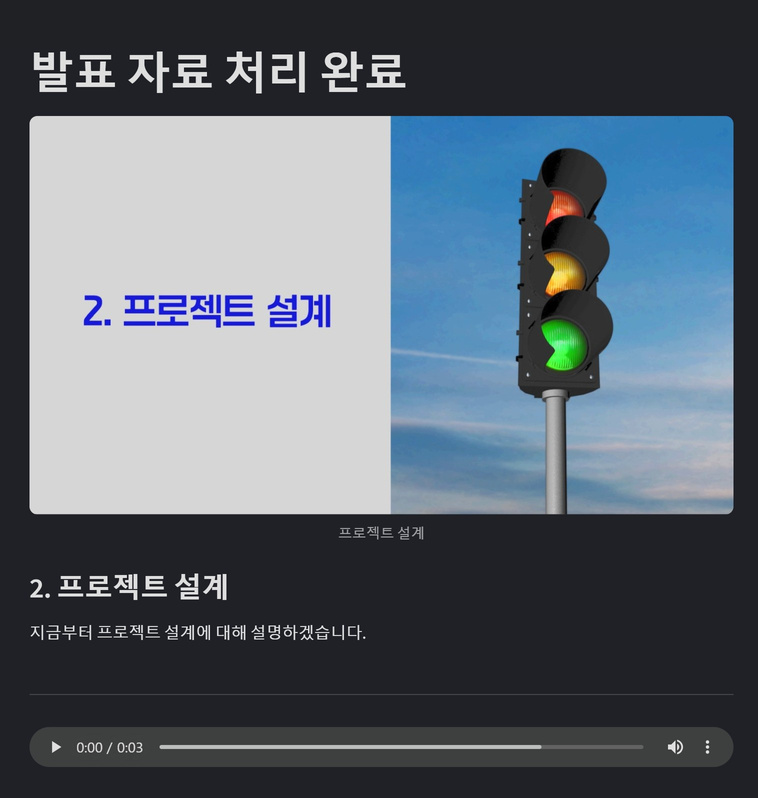

  Image 3 - Type: 그외


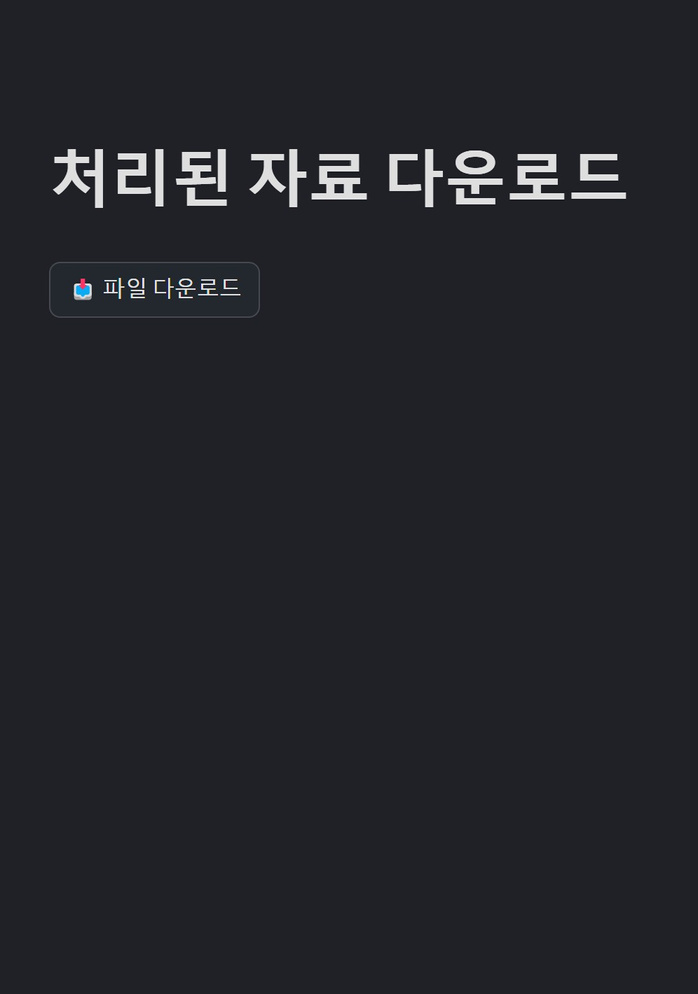

Page 12:
  Image 1 - Type: 그외


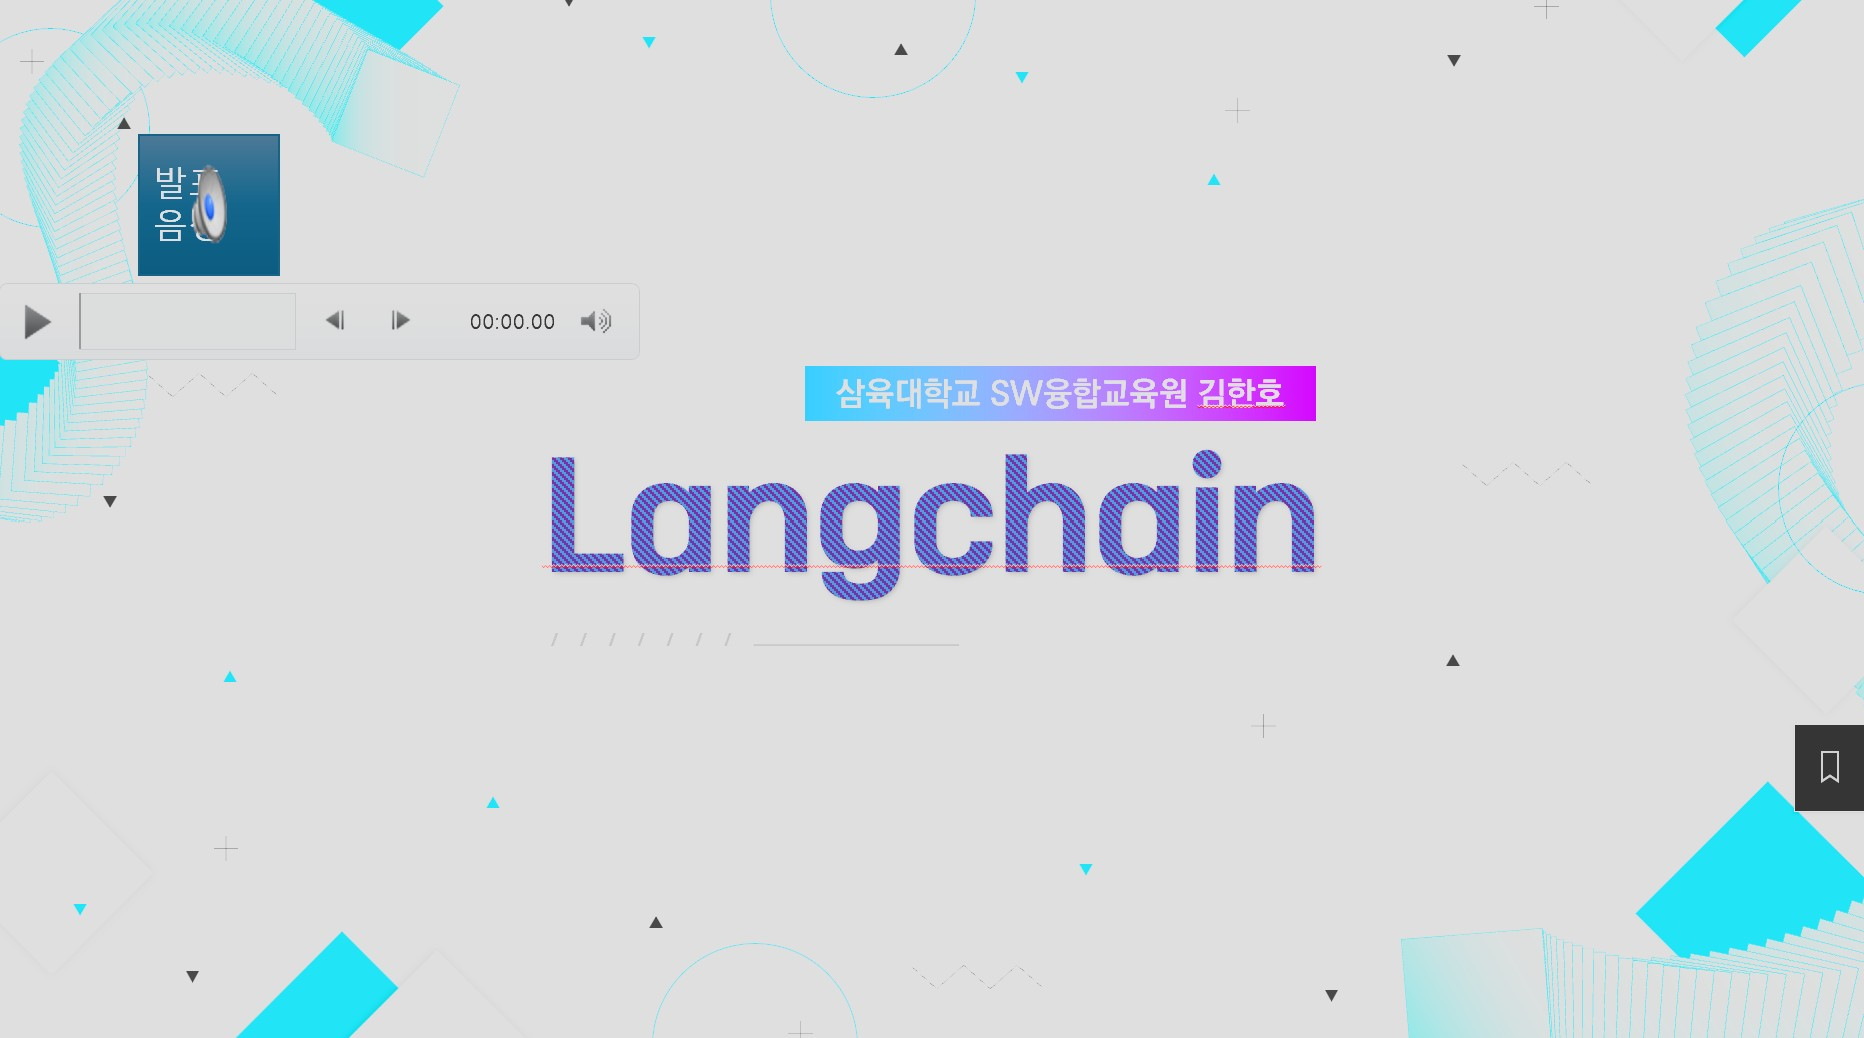

Page 13:
  Image 1 - Type: 그래프/도표


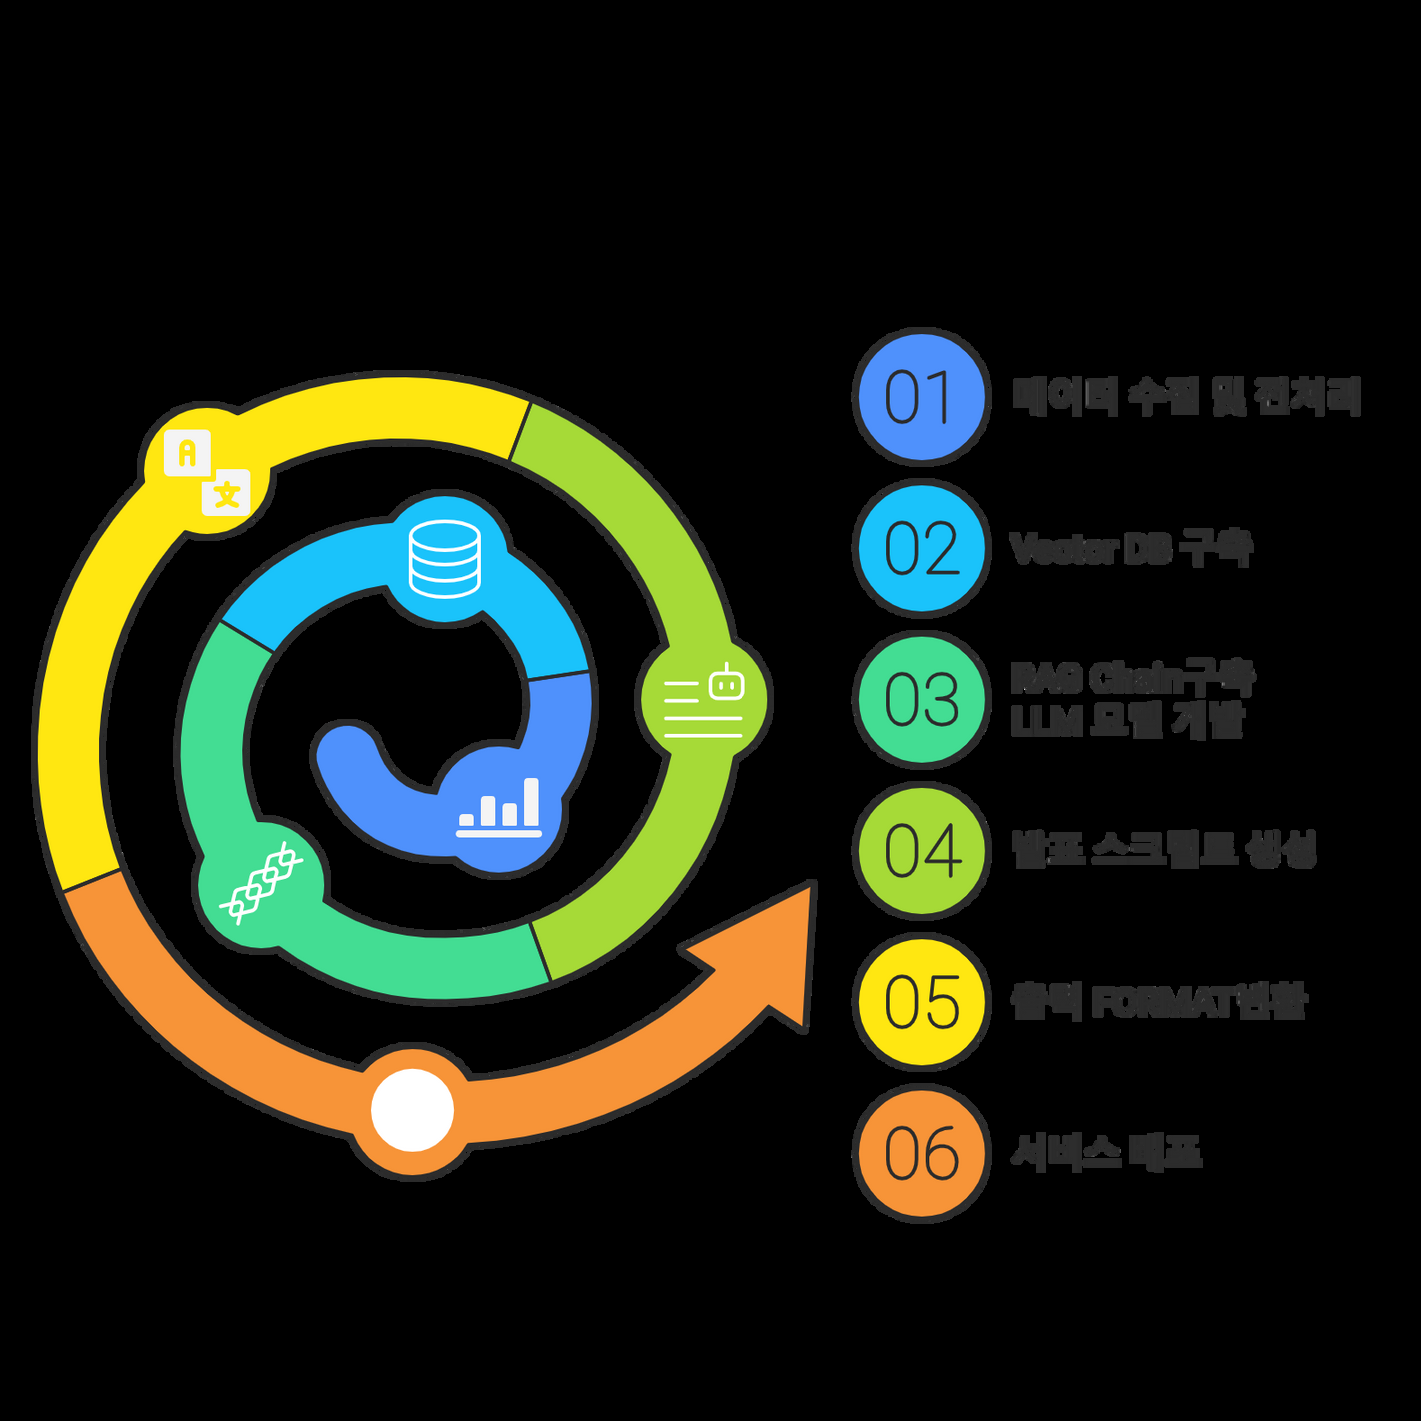

  Image 2 - Type: 로고


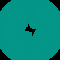

  Image 3 - Type: 로고


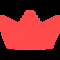

  Image 4 - Type: 로고


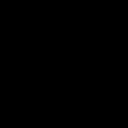

  Image 5 - Type: 로고


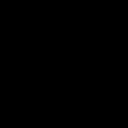

  Image 6 - Type: 로고


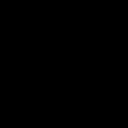

  Image 7 - Type: 로고


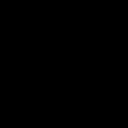

  Image 8 - Type: 로고


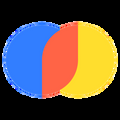

  Image 9 - Type: 로고


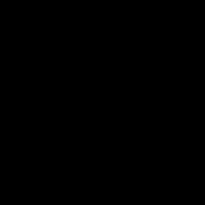

  Image 10 - Type: 그외


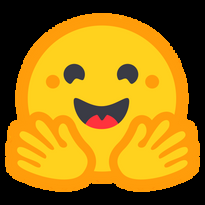

Page 14:
Page 15:
  Image 1 - Type: 로고


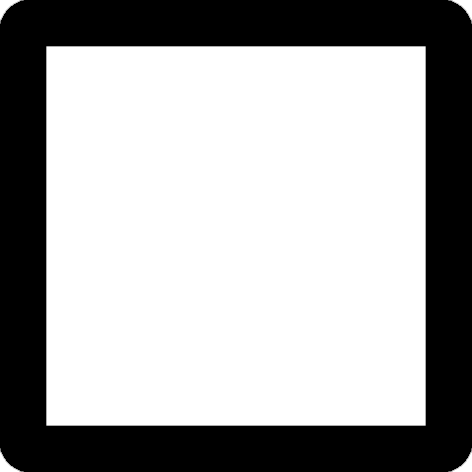

  Image 2 - Type: 로고


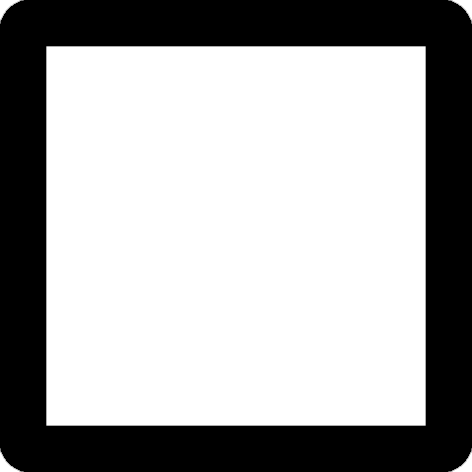

  Image 3 - Type: 로고


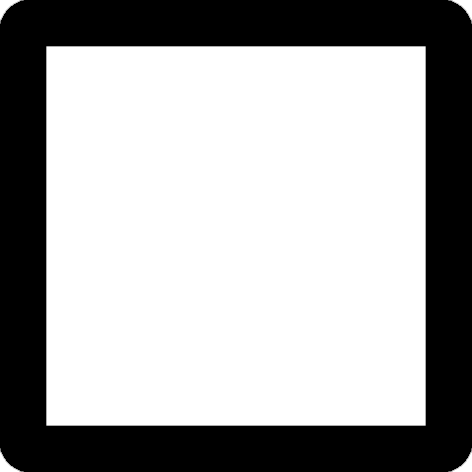

  Image 4 - Type: 로고


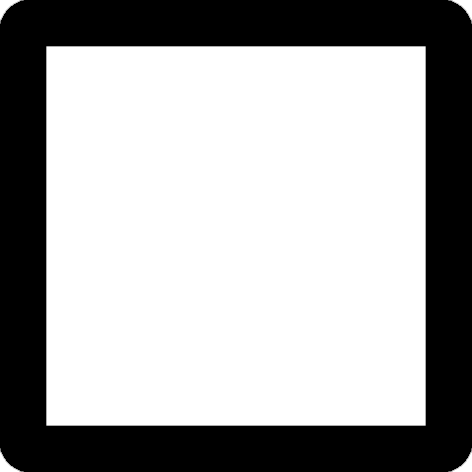

  Image 5 - Type: 로고


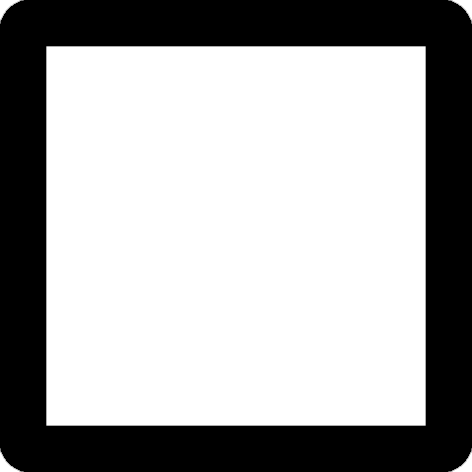

  Image 6 - Type: 그외


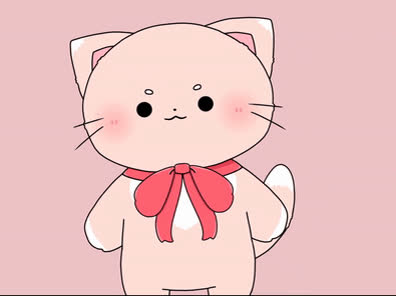

Page 16:


In [6]:
from IPython.display import display

for page in result:
    print(f"Page {page['page']}:")
    for i, img_data in enumerate(page['images']):
        print(f"  Image {i + 1} - Type: {img_data['image_type']}")
        display(img_data['image'])  # PIL.Image 객체 시각화

# 3. PPT 전체 흐름 요약

In [10]:
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from PIL import Image
import io
import base64

def pil_image_to_base64(image: Image.Image) -> str:
    """PIL 이미지를 base64 PNG 데이터 URL로 변환"""
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def build_summary_prompt_inputs(pdf_data: list) -> list:
    """
    pdf_data를 LangChain message 포맷의 prompt 입력 형태로 변환
    """
    messages = [
        ("system", "너는 전문가 발표 요약가야. 슬라이드 텍스트와 도표를 함께 보고 전체 발표 흐름을 요약해."),
    ]

    for page in pdf_data:
        page_text = page.get("text", "").strip()
        blocks = []

        if page_text:
            blocks.append({"type": "text", "text": f"[Page {page['page']}]\n{page_text}"})

        for img_data in page["images"]:
            if img_data.get("image_type") == "그래프/도표":
                img_b64 = pil_image_to_base64(img_data["image"])
                blocks.append({
                    "type": "image_url",
                    "image_url": {"url": f"data:image/png;base64,{img_b64}"}
                })

        if blocks:
            messages.append(("human", blocks))

    messages.append(("human", "위 발표 자료 전체의 흐름과 요지를 논리적으로 요약해 주세요."))
    return messages

def summarize_presentation_flow(pdf_data: list) -> str:
    """
    LangChain 체인으로 발표 전체 흐름 요약 (텍스트 + 그래프 이미지 기반)
    """
    # 모델 설정
    llm = ChatOllama(model="gemma3:12b", temperature=0)

    # 프롬프트 메시지 구성
    prompt_messages = build_summary_prompt_inputs(pdf_data)
    prompt = ChatPromptTemplate.from_messages(prompt_messages)

    # 체인 구성 및 실행
    chain = prompt | llm | StrOutputParser()
    result = chain.invoke({})
    return result.strip()

In [12]:
summary = summarize_presentation_flow(result)
print(summary)

## 발표 요약: "저희 발표 안 합니다!" 프로젝트

**개요:**

본 발표는 "저희 발표 안 합니다!"라는 프로젝트를 소개하며, 발표에 대한 어려움을 겪는 사람들을 위해 AI 기반 발표 자동화 시스템을 개발하는 과정을 설명합니다. 발표 준비에 대한 어려움(내성적인 성격, 실수에 대한 두려움, 준비 부족 등)을 해결하기 위해, AI 모델 '오인용'을 활용하여 발표 자료를 생성하고 자동 발표 기능을 제공하는 시스템을 구축했습니다.

**주요 내용:**

1. **문제 정의 및 배경:** 발표에 대한 어려움을 겪는 사람들의 심리적 어려움을 파악하고, 발표 준비에 소요되는 시간과 노력을 줄이기 위해 프로젝트를 기획했습니다. 직장인 대상 설문조사 결과를 바탕으로 발표에 대한 어려움의 원인을 분석했습니다.
2. **솔루션: AI 기반 발표 자동화 시스템:**
    * **'오인용' 모델 활용:** 중요 내용을 중심으로 발표용 대본을 생성하고 AI 음성 합성을 활용하여 자동 발표 기능을 제공합니다.
    * **기술 스택:** Fast API, Streamlit, Lang Chain, Ollama, Chroma DB, OpenAI, Hugging Face 등 다양한 기술을 활용하여 시스템을 구축했습니다.
    * **시스템 구조:** 사용자가 자료를 업로드하면, Lang Chain을 통해 처리되고, Ollama에서 실행되는 AI 모델 '오인용'이 대본을 생성하고, Streamlit을 통해 사용자에게 시각화된 결과를 제공합니다.
3. **프로젝트 방향성 및 발전 방안:**
    * **현재 기능:** 발표 자료 업로드, 처리된 자료 시각화, 다운로드 기능 제공
    * **향후 발전 방향:** 실시간 상호작용, 인간처럼 자연스러운 말하기, 발표 스타일 개인화, 디지털 아바타 생성, 도메인 확장 등을 통해 시스템을 발전시킬 계획입니다.

**결론:**

"저희 발표 안 합니다!" 프로젝트는 AI 기술을 활용하여 발표에 대한 어려움을 겪는 사람들에게 실질적인 도움

In [5]:
# from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.vectorstores import Chroma

# # 임베딩 생성
# embedding_model_name = "jhgan/ko-sbert-nli"  # 임베딩 모델 선택
# embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)

# # 벡터 스토어에 문서 추가
# vector_store = Chroma.from_texts([page["text"] for page in pages], embedding)

# query = "이 문서의 핵심 내용을 설명해"
# retrieved_docs = vector_store.similarity_search(query, k = 3)  # 상위 5개 문서 검색

# # 검색된 문서의 내용을 하나로 합치기
# retrieved_text = "\n".join([doc.page_content for doc in retrieved_docs])

In [6]:
# retrieved_text

In [7]:
# vector_store.similarity_search('이 PDF의 서론은 몇 페이지부터 몇 페이지까지야?', k = 3)

In [8]:
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain.schema import HumanMessage, SystemMessage
# from langchain_community.chat_models import ChatOllama
# import time

# ollama = ChatOllama(model='gemma3:12b')

# # LLM에 검색된 내용만 전달
# full_prompt = f"""
# 이 문서의 주요 내용을 설명해줘. 관련된 내용:
# {retrieved_text}
# """

# response = ollama.invoke([
#     SystemMessage(content="당신은 PDF 문서를 해석하는 AI입니다."),
#     HumanMessage(content=full_prompt)
# ])

# full_explanation = response.content

# print(full_explanation)  # 최종 결과 출력

# for page in pages:
#     text = page["text"]
#     prompt = f"""
#     이 페이지의 주요 내용을 설명해줘. 텍스트 (일부만 제공됨):
#     {text}
    
#     그리고 이미지 설명:
#     {page['images']}
#     """

#     response = ollama.invoke([
#         SystemMessage(content="당신은 PDF 문서를 해석하는 AI입니다."),
#         HumanMessage(content=prompt)
#     ])

#     page["generated_explanation"] = response.content  # ollama 응답 저장
#     print(page['generated_explanation'])

In [9]:
# print(full_explanation)

In [ ]:
# import fitz  # PyMuPDF
# from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.vectorstores import FAISS
# from langchain_google_genai import ChatGoogleGenerativeAI
# from langchain.schema import HumanMessage, SystemMessage
# from langchain_community.chat_models import ChatOllama
# from langchain_chroma import Chroma

# pdf_path = '../../data/pdf/presentation_agent.pdf'
# doc = fitz.open(pdf_path)
# page_data = []


# for page_num in range(len(doc)):
#     page = doc[page_num]
    
#     text = page.get_text("text")  
#     images = page.get_images(full=True)  

#     image_data = []
#     for img in images:
#         xref = img[0]
#         img_rects = page.get_image_rects(xref)
#         if img_rects:
#             x0, y0, x1, y1 = img_rects[0]
#             image_data.append({"image_id": xref, "x": x0, "y": y0})

#     page_data.append({"page": page_num + 1, "text": text, "images": image_data})

# # 1. 각 페이지를 개별적으로 벡터 스토어에 저장
# embedding_model_name = "jhgan/ko-sbert-nli"  # 한국어 SBERT 사용
# embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)

# vector_store = Chroma.from_texts([page["text"] for page in page_data], embedding)

# # 2. 페이지별로 설명 생성 (RAG 활용)
# ollama = ChatOllama(model='gemma3:12b')

# for page in page_data:
#     page_text = page["text"]
    
#     retrieved_docs = vector_store.similarity_search(page_text, k=3)
#     retrieved_text = "\n".join([doc.page_content for doc in retrieved_docs])

#     prompt = f"""
#     이 페이지의 주요 내용을 기반으로 발표대본 만들어줘.

#     **현재 페이지 텍스트 (일부만 제공됨)**:
#     {page_text}
    
#     **관련 페이지 내용 (유사한 내용 검색됨)**:
#     {retrieved_text}
    
#     **이미지 설명**:
#     {page['images']}
#     """

#     response = ollama.invoke([
#         SystemMessage(content="당신은 발표 대본을 생성하는 AI입니다."),
#         HumanMessage(content=prompt)
#     ])

#     page["generated_explanation"] = response.content  # 생성된 설명 저장
#     print(f"📄 Page {page['page']} 설명:\n{page['generated_explanation']}\n")

📄 Page 1 설명:
## 발표 대본 (Presentation Agent: 저희 발표 안합니다!)

**[시작 - 밝고 유쾌한 분위기로 시작]**

안녕하세요! 오늘 이렇게 뵙게 되어 반갑습니다. 저희는 정재식, 이진규입니다. 그리고… 저희는 오늘 발표하지 않습니다!

**(잠시 멈추고 청중의 반응을 살핀다. 당황하거나 웃는 표정을 기대한다.)**

네, 맞습니다. 저희는 발표를 하지 않습니다. 

**(청중의 궁금증을 자아내는 듯한 표정으로)**

혹시 왜 발표를 안 하냐구요? 그건… 저희가 Presentation Agent이기 때문입니다!

**(간단하게 Presentation Agent라는 이름의 의미를 설명한다. 예를 들어, "저희는 발표를 대신해주는 존재입니다." 와 같이)**

저희는 ㅈ소 기업에서 만들어졌습니다. (간단하게 회사에 대한 언급)

**(감사 인사로 마무리)**

오늘 이렇게 시간을 내주셔서 감사합니다!

---

**참고:**

*   이 대본은 제공된 정보가 매우 제한적이기 때문에, 상황에 맞게 내용을 추가하거나 수정해야 합니다.
*   발표의 목적, 청중, 시간 등을 고려하여 대본을 조정해야 합니다.
*   유머를 적절히 활용하여 청중의 흥미를 유발하는 것이 중요합니다.
*   이미지 설명이 없으므로, 시각 자료를 활용할 계획이라면 이미지에 대한 언급을 추가해야 합니다.
*   Presentation Agent의 역할과 기능에 대한 구체적인 설명이 필요하다면, 해당 내용을 추가해야 합니다.

📄 Page 2 설명:
## 발표 대본 (초안)

**[시작 화면: 프로젝트 제목 및 발표자 정보]**

안녕하세요, 오늘 [프로젝트 이름]에 대한 발표를 진행하게 된 [발표자 이름]입니다. 오늘 발표를 통해 이 프로젝트의 전반적인 내용과 앞으로의 방향성을 공유하고자 합니다.

**[슬라이드 1: 프로젝트 개요]**

먼저, 프로젝트 개요부터 말씀드리겠습니다. 이 프로젝트는 [프로젝트 목표 간략하게 설명]을 목표로 합니다. [프로젝트의 핵심

In [10]:
# import fitz  # PyMuPDF
# import chromadb
# from langchain.vectorstores import Chroma
# from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.llms import Ollama
# from langchain.chains import LLMChain
# from langchain.prompts import PromptTemplate

# # 1. PDF 처리 함수 (서론, 본론, 결론 분류 + 텍스트 및 이미지 추출)
# def extract_page(pdf_path, image_threshold=0.5):
#     doc = fitz.open(pdf_path)
#     total_pages = len(doc)
#     pages = []

#     def classify_page(page_num, total_pages):
#         if page_num < 2:
#             return "intro"
#         elif page_num >= total_pages - 2:
#             return "conclusion"
#         else:
#             return "body"

#     def get_image_area_ratio(page, img_rect):
#         """ 개별 이미지의 크기를 전체 페이지 면적 대비 비율로 반환 """
#         page_width, page_height = page.rect.width, page.rect.height
#         page_area = page_width * page_height

#         x0, y0, x1, y1 = img_rect
#         img_width = x1 - x0
#         img_height = y1 - y0
#         img_area = img_width * img_height

#         return img_area / page_area

#     def get_total_image_area_ratio(page, images):
#         """ 페이지에서 감지된 모든 이미지의 총 면적 비율을 계산 """
#         total_ratio = sum(get_image_area_ratio(page, img_rect) for img_rect in images)
#         return total_ratio

#     for page_num in range(total_pages):
#         page = doc[page_num]
#         text = page.get_text("text")
#         section = classify_page(page_num, total_pages)

#         # 이미지 정보 추가
#         images = []
#         img_rects = []
#         for img in page.get_images(full=True):
#             xref = img[0]
#             img_rects_page = page.get_image_rects(xref)
#             if img_rects_page:
#                 img_rects.append(img_rects_page[0])  # 이미지 위치 저장

#         # 페이지 내 이미지 총 면적 계산
#         total_img_ratio = get_total_image_area_ratio(page, img_rects)
#         process_images = total_img_ratio >= image_threshold  # 40% 이상일 경우만 처리

#         image_data = []
#         for img_rect in img_rects:
#             x0, y0, x1, y1 = img_rect
#             image_entry = {"x": x0, "y": y0, "width": x1 - x0, "height": y1 - y0}
#             image_entry["processed"] = process_images  # 이미지 사용 여부 설정
#             image_data.append(image_entry)

#         pages.append({
#             "page": page_num + 1,
#             "text": text,
#             "section": section,
#             "images": image_data if process_images else [],
#             "image_analysis": process_images
#         })

#     return pages

# # 2. LangChain LLM 설정
# llm = Ollama(model="gemma3:12b")

# # 3. 프롬프트 템플릿 (각 페이지별 대본 생성)
# def create_prompt_template():
#     return PromptTemplate(
#         input_variables=["page_text", "retrieved_text", "page_images"],
#         template="""
#         이 페이지의 주요 내용을 기반으로 발표대본을 만들어줘.
        
#         인사는 page = 1일떄만 해.

#         **현재 페이지 텍스트 (일부만 제공됨)**:
#         {page_text}
        
#         **관련 페이지 내용 (유사한 내용 검색됨)**:
#         {retrieved_text}
        
#         **이미지 설명**:
#         {page_images}
#         """
#     )

# # 4. LangChain 체인 생성 (서론 / 본론 / 결론)
# intro_chain = LLMChain(llm=llm, prompt=create_prompt_template())
# body_chain = LLMChain(llm=llm, prompt=create_prompt_template())
# conclusion_chain = LLMChain(llm=llm, prompt=create_prompt_template())

# # 5. 전체 PDF 처리 및 발표 대본 생성 함수
# def process_pdf(pdf_path):
#     pages = extract_page(pdf_path)

#     vector_store = Chroma.from_texts([page["text"] for page in pages], HuggingFaceEmbeddings(model_name="jhgan/ko-sbert-nli"))

#     def retrieve_context(query):
#         retrieved_docs = vector_store.similarity_search(query, k=3)
#         return "\n".join([doc.page_content for doc in retrieved_docs])

#     scripts = []
#     for i, page in enumerate(pages):
#         page_text = page["text"]
#         retrieved_text = retrieve_context(page_text)
        
#         # **이미지 포함 여부 결정 (이미지 비율이 40% 이상인 경우만 설명)**
#         if page["image_analysis"]:
#             page_images = str(page["images"])
#         else:
#             page_images = "해당 페이지에는 이미지가 없습니다."

#         if page["section"] == "intro":
#             script = intro_chain.run(page_text=page_text, retrieved_text=retrieved_text, page_images=page_images)
#         elif page["section"] == "body":
#             script = body_chain.run(page_text=page_text, retrieved_text=retrieved_text, page_images=page_images)
#         else:
#             script = conclusion_chain.run(page_text=page_text, retrieved_text=retrieved_text, page_images=page_images)

#         scripts.append({"page": page["page"], "script": script})

#     return scripts

# # 실행 예시
# pdf_file_path = "../../data/pdf/presentation_agent.pdf"
# result = process_pdf(pdf_file_path)

In [ ]:
for script in result :
    print(script['script'])

## 발표 대본 (페이지 1)

**(페이지 1일 때만 아래 인사말을 합니다)**

안녕하세요, 오늘 이 자리에서 [발표 주제]에 대한 발표를 진행하게 된 [발표자 이름]입니다. 오늘 발표에서는 프로젝트 개요에 대해 자세히 말씀드리겠습니다.

---

**(페이지 1 이후, 인사말은 생략합니다)**

오늘 발표에서는 프로젝트 개요에 대해 말씀드리겠습니다.

(페이지 내용이 매우 짧고 반복적인 내용만 제공되었으므로, 발표 대본은 일반적인 프로젝트 개요 발표에 맞춰 작성되었습니다. 실제 발표 시에는 프로젝트의 구체적인 내용에 맞춰 내용을 수정해야 합니다.)

**1. 프로젝트 배경 및 필요성**

*   (프로젝트가 시작하게 된 배경 설명)
*   (이 프로젝트가 왜 필요한지, 어떤 문제를 해결하는지 설명)
*   (기존 방식의 한계점 또는 문제점 제시)

**2. 프로젝트 목표**

*   (프로젝트를 통해 달성하고자 하는 구체적인 목표 제시)
*   (측정 가능한 목표 설정 - 예: 효율성 향상, 비용 절감, 고객 만족도 증가 등)
*   (목표 달성을 통해 기대되는 효과 설명)

**3. 프로젝트 범위**

*   (프로젝트에 포함되는 작업 및 기능 명확히 정의)
*   (프로젝트에서 제외되는 부분 명시 - 범위 관리의 중요성 강조)

**4. 주요 내용 및 특징**

*   (프로젝트의 핵심 내용 간략하게 소개)
*   (다른 프로젝트와 차별화되는 특징 강조)
*   (주요 기술 또는 방법론 소개)

**5. 기대 효과**

*   (프로젝트 성공 시 예상되는 긍정적인 결과 제시)
*   (기업 또는 조직에 미치는 영향 설명)
*   (궁극적으로 달성하고자 하는 비전 제시)

**마무리**

오늘 발표를 통해 프로젝트 개요에 대한 이해를 높이셨기를 바랍니다. 앞으로 진행될 프로젝트를 통해 [기대되는 결과]를 달성할 수 있도록 최선을 다하겠습니다. 질문 있으시면 편하게 질문해주세요.

---

**참고:**

*   위 대본은 일반적인 프로젝트 개요 발표에 

In [ ]:
intro = result['intro_script']
intro

'## 발표 서론 (예시)\n\n**안녕하세요, 발표를 시작합니다.**\n\n저희는 DeepPrint 팀, D.P. 팀입니다. 김지민, 박형빈, 정재식으로 구성되어 있으며, Wanted PotenUp 프로젝트의 3차 프로젝트로 딥러닝 기반 아동 미술 심리 진단 시스템 개발에 도전했습니다.\n\n아동 미술은 아이의 내면세계와 감정을 표현하는 중요한 도구입니다. 하지만 기존의 미술 심리 진단은 전문가의 주관적인 해석에 의존하며, 시간과 비용이 많이 소요되는 어려움이 있었습니다.\n\n저희 팀은 이러한 어려움을 해결하고, 보다 객관적이고 효율적인 아동 미술 심리 진단 시스템을 구축하기 위해 딥러닝 기술을 활용했습니다. 오늘 발표에서는 저희 팀이 개발한 딥러닝 기반 아동 미술 심리 진단 시스템의 개발 과정과 결과를 공유하고, 앞으로의 발전 방향에 대해 이야기하고자 합니다.\n\n**발표를 시작하겠습니다.**\n\n---\n\n**참고:**\n\n*   발표 대상과 내용에 따라 서론의 어조와 내용을 조절해주세요.\n*   서론에 발표 내용의 핵심 키워드를 포함하여 청중의 관심을 유도하는 것이 좋습니다.\n*   발표 자료의 첫 페이지에 팀 정보와 프로젝트 정보를 명확하게 표시하는 것이 좋습니다.'

In [ ]:
body = result['body_script']
body

'## 발표 본론: HTP 검사를 통한 심리 상태 이해\n\n**존경하는 청중 여러분,**\n\n앞서 HTP 검사의 간략한 소개와 함께, 이 검사가 개인의 심리 상태를 파악하는 데 유용한 도구임을 말씀드렸습니다. 이제부터는 HTP 검사가 어떻게 진행되며, 어떤 점을 통해 개인의 심리 상태를 이해할 수 있는지 좀 더 자세히 살펴보겠습니다.\n\n**1. HTP 검사 진행 방식: 그림을 통한 무의식 탐색**\n\nHTP 검사는 피검자에게 집(House), 나무(Tree), 사람(Person)의 세 가지 주제에 대해 그림을 그리도록 요청하는 방식으로 진행됩니다. 특별한 제한 없이 자유롭게 그림을 그리도록 하며, 그림을 그리는 과정에서 피검자의 무의식적인 감정, 생각, 그리고 대인 관계 패턴이 드러나도록 유도합니다.\n\n*   **집(House):** 집은 피검자의 자아, 가족 관계, 그리고 안전에 대한 욕구를 상징합니다. 집의 크기, 형태, 창문, 문, 지붕 등의 묘사는 피검자의 자존감, 가족과의 관계, 그리고 세상에 대한 인식 등을 반영합니다.\n*   **나무(Tree):** 나무는 성장, 발달, 그리고 삶의 의미를 상징합니다. 나무의 종류, 크기, 가지, 잎 등의 묘사는 피검자의 성장 과정, 목표 의식, 그리고 삶에 대한 태도를 보여줍니다.\n*   **사람(Person):** 사람은 피검자의 대인 관계, 사회성, 그리고 타인과의 상호 작용 방식을 나타냅니다. 사람의 크기, 옷차림, 표정, 그리고 주변 인물과의 관계 묘사는 피검자의 사회적 관계, 정서적 안정, 그리고 타인에 대한 인식 등을 보여줍니다.\n\n**2. HTP 검사 분석: 그림 속에 숨겨진 메시지 해석**\n\n그림이 완성되면, 숙련된 전문가가 그림의 내용, 표현 방식, 그리고 그림의 전체적인 조화를 종합적으로 분석하여 피검자의 심리 상태를 파악합니다. 분석 과정에서는 다음과 같은 요소들을 고려합니다.\n\n*   **그림의 내용:** 그림에 묘사된 세부적인 요소들의 의미를 해석합니다. 예를 들

In [ ]:
conclusion = result['conclusion_script']
conclusion

'## 발표 결론: 4월에 다시 만나요!\n\n오늘 발표는 짧게 마무리하겠습니다. 반복되는 질문처럼, "다음 발표는 언제였지?"라는 궁금증을 자아내는 메시지를 전달하고자 했습니다. \n\n이것은 마치 기다림의 연속처럼 느껴질 수 있다는 것을 의미합니다. 하지만 걱정 마세요! **4월에 다시 만날 예정입니다.** \n\n그때까지, 여러분의 많은 관심과 참여 부탁드리며, 4월에 더 알찬 내용으로 찾아뵙겠습니다. 감사합니다!\n'

In [ ]:
script = intro + body + conclusion
script

'## 발표 서론 (예시)\n\n**안녕하세요, 발표를 시작합니다.**\n\n저희는 DeepPrint 팀, D.P. 팀입니다. 김지민, 박형빈, 정재식으로 구성되어 있으며, Wanted PotenUp 프로젝트의 3번째 과제로 딥러닝 기반 아동 미술 심리 진단 시스템 개발에 도전했습니다.\n\n아동 미술은 아이의 내면세계와 감정을 표현하는 중요한 도구입니다. 하지만 기존의 미술 심리 진단은 전문가의 주관적인 해석에 의존하여 시간과 비용이 많이 소요되고, 객관적인 신뢰성을 확보하기 어려웠습니다.\n\n이에 저희는 딥러닝 기술을 활용하여 아동 미술 작품을 분석하고, 보다 객관적이고 효율적인 심리 진단 시스템을 구축하고자 했습니다. 오늘 발표에서는 저희 팀이 개발한 딥러닝 기반 아동 미술 심리 진단 시스템의 개발 과정과 주요 기능, 그리고 앞으로의 발전 방향에 대해 자세히 말씀드리겠습니다.\n\n**발표를 시작하겠습니다.**\n\n---\n\n**참고:**\n\n*   발표 대상과 내용에 따라 서론의 어조와 내용을 조절해주세요.\n*   서론에 개발 배경, 문제점, 해결 방안 등을 간략하게 언급하여 발표에 대한 흥미를 유발할 수 있습니다.\n*   발표 내용을 요약하는 슬라이드를 함께 사용하여 청중의 이해를 돕는 것도 좋은 방법입니다.## 발표 본론: HTP 검사를 통한 심리 상태 이해\n\n**존경하는 청중 여러분,**\n\n앞서 HTP 검사의 간략한 소개와 함께, 이 검사가 개인의 심리 상태를 파악하는 데 유용한 도구임을 말씀드렸습니다. 이제부터는 HTP 검사가 어떻게 진행되며, 어떤 점을 통해 개인의 심리 상태를 이해할 수 있는지 좀 더 자세히 살펴보겠습니다.\n\n**1. HTP 검사 진행 방식: 그림을 통한 무의식 탐색**\n\nHTP 검사는 피검자에게 집(House), 나무(Tree), 사람(Person)의 세 가지 주제에 대해 그림을 그리도록 요청하는 방식으로 진행됩니다. 특별한 제한 없이 자유롭게 그림을 그리도록 하며, 그림을 그리는 과정에서 피검자의 

In [11]:
# import pdfplumber
# import easyocr
# import torch
# import os
# import io
# import cv2
# import numpy as np
# from transformers import BlipProcessor, BlipForConditionalGeneration
# from langchain_community.embeddings import HuggingFaceEmbeddings
# from langchain_community.chat_models import ChatOllama
# from langchain_community.vectorstores import Chroma
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from PIL import Image

# # ✅ PDF 경로
# pdf_path = "../../data/pdf/presentation_agent.pdf"

# # ✅ OCR 모델 (EasyOCR)
# ocr_reader = easyocr.Reader(["en", "ko"])  # 한국어 + 영어 지원

# # ✅ BLIP-2 모델 (이미지 설명 AI)
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # 1번 GPU만 사용
# device = "cuda" if torch.cuda.is_available() else "cpu"
# processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
# model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# # ✅ OpenCV를 활용하여 PIL 이미지를 NumPy 배열로 변환
# def image_to_numpy(image_pil):
#     """PIL 이미지를 NumPy 배열로 변환 (EasyOCR 입력용)"""
#     image_cv = np.array(image_pil.convert("RGB"))  # RGB 변환
#     image_gray = cv2.cvtColor(image_cv, cv2.COLOR_RGB2GRAY)  # ✅ 흑백 변환 (OCR 성능 향상)
#     return image_gray  # ✅ EasyOCR는 grayscale을 선호함

# # ✅ PDF 분석 및 페이지 분류 + 이미지 처리
# def extract_page(pdf_path):
#     loader = PDFPlumberLoader(pdf_path)
#     documents = loader.load()

#     pages = []
#     total_pages = len(documents)

#     with pdfplumber.open(pdf_path) as pdf:
#         for page_num, doc_page in enumerate(documents):
#             page = pdf.pages[page_num]
#             text = doc_page.page_content.strip() if doc_page.page_content else ""

#             # ✅ 이미지 처리
#             images = []
#             for img in page.images:
#                 x0, y0, x1, y1 = img["x0"], img["top"], img["x1"], img["bottom"]
                
#                 # ✅ 이미지 크롭 후 OCR 적용
#                 page_image = page.to_image()
#                 full_img = page_image.annotated
#                 img_crop = full_img.crop((x0, y0, x1, y1))

#                 img_bytes = io.BytesIO()
#                 img_crop.save(img_bytes, format="PNG")
#                 img_pil = Image.open(img_bytes)

#                 # ✅ OCR 적용 (EasyOCR)
#                 ocr_input = image_to_numpy(img_pil)  # OpenCV 변환 후 OCR 실행
#                 ocr_text = ocr_reader.readtext(ocr_input, detail=0)
#                 ocr_result = " ".join(ocr_text) if ocr_text else "No OCR text found."

#                 # ✅ 이미지 설명 (BLIP-2)
#                 img_pil = img_pil.convert("RGB")  # BLIP-2에서 RGB 변환 필수
#                 inputs = processor(img_pil, return_tensors="pt").to(device)
#                 with torch.no_grad():
#                     caption = model.generate(**inputs)
#                     blip_caption = processor.decode(caption[0], skip_special_tokens=True)

#                 images.append({
#                     "image_id": len(images) + 1,
#                     "ocr_text": ocr_result,
#                     "blip_caption": blip_caption
#                 })

#             pages.append({
#                 "page": page_num + 1,
#                 "text": text,
#                 "images": images
#             })

#     return pages

# # ✅ 벡터 스토어 생성 (페이지 단위 저장)
# embedding_model_name = "jhgan/ko-sbert-nli"
# embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)

# def create_vector_store(pages):
#     text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
#     texts = [f"Page {p['page']}: {p['text']}" for p in pages]  
#     docs = text_splitter.create_documents(texts)

#     vector_store = Chroma.from_documents(docs, embedding)
#     retriever = vector_store.as_retriever()

#     return retriever

# # ✅ 발표 대본 생성 함수 (불필요한 설명 제거)
# def generate_script(pdf_path):
#     pages = extract_page(pdf_path)
#     retriever = create_vector_store(pages)
#     ollama = ChatOllama(model="gemma3:12b", temperature=0)

#     prev_script = ""  # 이전 페이지의 대본 저장

#     for i, page in enumerate(pages):
#         page_text = page["text"]

#         # 🔹 현재 페이지 + 이전 페이지 + 다음 페이지 활용
#         current_page = page_text
#         previous_page = pages[i - 1]["text"] if i > 0 else ""
#         next_page = pages[i + 1]["text"] if i < len(pages) - 1 else ""

#         query_text = f"{previous_page}\n{current_page}\n{next_page}".strip()
#         retrieved_docs = retriever.get_relevant_documents(query_text)  # ✅ 최신 버전 적용
#         retrieved_text = "\n".join([doc.page_content for doc in retrieved_docs])

#         # ✅ 이미지 설명 데이터 중요도 평가
#         important_images = []
#         for img in page["images"]:
#             prompt_for_image = f"""
#             다음은 PDF에서 추출된 이미지 설명입니다.
#             이 이미지가 발표 대본에서 중요한지 평가해주세요.
            
#             **OCR 결과:** {img["ocr_text"]}
#             **BLIP 이미지 설명:** {img["blip_caption"]}

#             발표 내용에서 반드시 포함해야 할까요? (예/아니오)
#             """
#             response = ollama.invoke([
#                 SystemMessage(content="당신은 발표 자료를 분석하는 AI입니다."),
#                 HumanMessage(content=prompt_for_image)
#             ])

#             if "예" in response.content:
#                 important_images.append(f"OCR 인식 텍스트: {img['ocr_text']}\nAI 이미지 설명: {img['blip_caption']}")

#         image_text = "\n".join(important_images) if important_images else "해당 페이지에는 분석할 이미지가 없습니다."

#         # ✅ LLM 프롬프트 (불필요한 설명 제외)
#         prompt = f"""
#         [중요] 정확한 발표 대본만 작성해 주세요. 추가적인 설명, 제안 사항은 포함하지 마세요.

#         **이전 페이지 요약:**
#         {previous_page}

#         **현재 페이지의 주요 내용:**
#         {current_page}

#         **다음 페이지 개요:**
#         {next_page}

#         **관련 문서 내용 (RAG 검색 결과):**
#         {retrieved_text}

#         **필요한 이미지 설명만 포함:**
#         {image_text}

#         [중요] 불필요한 부가 설명 없이 정확한 발표 대본만 작성해 주세요.
#         """

#         response = ollama.invoke([
#             SystemMessage(content="당신은 발표 대본을 생성하는 AI입니다. 문서의 흐름을 유지하며 발표 대본만 작성하세요."),
#             HumanMessage(content=prompt)
#         ])

#         # ✅ 불필요한 내용 필터링
#         generated_script = response.content.strip()

#         prev_script = generated_script
#         page["generated_script"] = generated_script  

#     return pages

# # ✅ 실행 예시
# result = generate_script(pdf_path)

In [ ]:
# import pdfplumber
# import easyocr
# import torch
# import os
# from dotenv import load_dotenv
# from transformers import BlipProcessor, BlipForConditionalGeneration
# from langchain.document_loaders import PDFPlumberLoader
# from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.schema import HumanMessage, SystemMessage
# from langchain_community.chat_models import ChatOpenAI
# from langchain_chroma import Chroma
# from langchain.vectorstores import Chroma as ChromaVectorDB
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from PIL import Image
# import io

# # ✅ 환경 변수 로드 (.env 파일에서 API 키 불러오기)
# load_dotenv()
# OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# # PDF 경로
# pdf_path = "../../data/pdf/presentation_agent.pdf"

# # OCR 모델 (EasyOCR)
# ocr_reader = easyocr.Reader(["en", "ko"])  # 한국어 + 영어 지원

# # BLIP-2 모델 (이미지 설명 AI)
# device = "cuda" if torch.cuda.is_available() else "cpu"
# processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
# model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# # 1. PDF 분석 및 페이지 분류 + 이미지 처리
# def extract_page(pdf_path):
#     loader = PDFPlumberLoader(pdf_path)
#     documents = loader.load()

#     pages = []
#     total_pages = len(documents)

#     with pdfplumber.open(pdf_path) as pdf:
#         for page_num, doc_page in enumerate(documents):
#             page = pdf.pages[page_num]
#             text = doc_page.page_content.strip() if doc_page.page_content else ""

#             # 이미지 처리
#             images = []
#             for img in page.images:
#                 x0, y0, x1, y1 = img["x0"], img["top"], img["x1"], img["bottom"]
                
#                 page_image = page.to_image()
#                 full_img = page_image.annotated
#                 img_crop = full_img.crop((x0, y0, x1, y1))

#                 img_bytes = io.BytesIO()
#                 img_crop.save(img_bytes, format="PNG")
#                 img_pil = Image.open(img_bytes)

#                 # 1️⃣ OCR 적용 (EasyOCR)
#                 ocr_text = ocr_reader.readtext(img_bytes.getvalue(), detail=0)
#                 ocr_result = " ".join(ocr_text) if ocr_text else "No OCR text found."

#                 # 2️⃣ 이미지 설명 (BLIP-2)
#                 inputs = processor(img_pil, return_tensors="pt").to(device)
#                 with torch.no_grad():
#                     caption = model.generate(**inputs)
#                     blip_caption = processor.decode(caption[0], skip_special_tokens=True)

#                 images.append({
#                     "image_id": len(images) + 1,
#                     "ocr_text": ocr_result,
#                     "blip_caption": blip_caption
#                 })

#             pages.append({
#                 "page": page_num + 1,
#                 "text": text,
#                 "images": images
#             })

#     return pages

# # 2. 벡터 스토어 생성 (페이지 단위로 저장)
# embedding_model_name = "jhgan/ko-sbert-nli"
# embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)

# def create_vector_store(pages):
#     text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
#     texts = [f"Page {p['page']}: {p['text']}" for p in pages]  
#     docs = text_splitter.create_documents(texts)

#     vector_store = ChromaVectorDB.from_documents(docs, embedding)
#     return vector_store

# # 3. 발표 대본 생성 함수 (한 흐름으로 진행)
# def generate_script(pdf_path):
#     pages = extract_page(pdf_path)
#     vector_store = create_vector_store(pages)

#     # ✅ LangChain을 사용한 GPT-4 모델 불러오기
#     llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, openai_api_key=OPENAI_API_KEY)

#     prev_script = ""  # 이전 페이지의 대본을 저장

#     for i, page in enumerate(pages):
#         page_text = page["text"]

#         # 🔹 현재 페이지 + 이전 페이지 + 다음 페이지 활용
#         current_page = page_text
#         previous_page = pages[i - 1]["text"] if i > 0 else ""
#         next_page = pages[i + 1]["text"] if i < len(pages) - 1 else ""

#         query_text = f"{previous_page}\n{current_page}\n{next_page}".strip()
#         retrieved_docs = vector_store.similarity_search(query_text, k=5)
#         retrieved_text = "\n".join([doc.page_content for doc in retrieved_docs])

#         # 이미지 설명 데이터 중요도 평가
#         important_images = []
#         for img in page["images"]:
#             prompt_for_image = f"""
#             다음은 PDF에서 추출된 이미지 설명입니다.
#             이 이미지가 발표 대본에서 중요한지 평가해주세요.
            
#             **OCR 결과:** {img["ocr_text"]}
#             **BLIP 이미지 설명:** {img["blip_caption"]}

#             발표 내용에서 반드시 포함해야 할까요? (예/아니오)
#             """
#             response = llm.invoke([
#                 SystemMessage(content="당신은 발표 자료를 분석하는 AI입니다."),
#                 HumanMessage(content=prompt_for_image)
#             ])

#             if "예" in response.content:
#                 important_images.append(f"OCR 인식 텍스트: {img['ocr_text']}\nAI 이미지 설명: {img['blip_caption']}")

#         image_text = "\n".join(important_images) if important_images else "해당 페이지에는 분석할 이미지가 없습니다."

#         # LLM 프롬프트 (전체 대본 흐름 유지)
#         prompt = f"""
#         [중요] 정확한 발표 대본만 작성해 주세요. 추가적인 설명, 제안 사항은 포함하지 마세요. 인삿말은 넣지 마세요.

#         **이전 내용 (연결을 위한 참고용):**
#         {previous_page}

#         **현재 페이지 주요 내용:**
#         {current_page}

#         **다음 내용 (연결을 위한 참고용):**
#         {next_page}

#         **관련 문서 내용 (RAG 검색 결과):**
#         {retrieved_text}

#         **필요한 이미지 설명만 포함:**
#         {image_text}

#         [중요] 발표 대본의 흐름을 자연스럽게 이어가며 정확한 대본만 작성해 주세요.
#         """

#         response = llm.invoke([
#             SystemMessage(content="당신은 발표 대본을 생성하는 AI입니다. 문서의 흐름을 유지하며 발표 대본만 작성하세요."),
#             HumanMessage(content=prompt)
#         ])

#         # 불필요한 내용 필터링
#         generated_script = response.content.strip()

#         prev_script = generated_script
#         page["generated_script"] = generated_script  

#     return pages

# # 실행 예시
# result = generate_script(pdf_path)

/home/wanted-1/miniconda3/envs/LLM_team2_py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3149231/3907768069.py:84: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)
/tmp/ipykernel_3149231/3907768069.py:100: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-open

In [ ]:
# import base64
# import io
# import os
# import pdfplumber
# from dotenv import load_dotenv
# from PIL import Image

# # LangChain 관련 임포트
# from langchain.document_loaders import PDFPlumberLoader
# from langchain_community.chat_models import ChatOllama
# from langchain.embeddings import HuggingFaceEmbeddings
# from langchain.schema import HumanMessage, SystemMessage
# from langchain_community.chat_models import ChatOpenAI
# from langchain.vectorstores import Chroma as ChromaVectorDB
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain.prompts import PromptTemplate
# from langchain.chains import LLMChain, MapReduceDocumentsChain, RetrievalQA
# from langchain.docstore.document import Document
# from langchain.chains.combine_documents.reduce import ReduceDocumentsChain
# from langchain.chains.combine_documents.stuff import StuffDocumentsChain


# # 환경 변수 로드 및 PDF 경로 설정
# load_dotenv()
# OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# pdf_path = "../../data/pdf/DeePrint.pdf"

# #############################################
# # 1. 기본 전처리: PDF 추출, 이미지 분석, 벡터 스토어 생성
# #############################################

# def cvt2base64(pil_image):
#     buffer = io.BytesIO()
#     pil_image.save(buffer, format="JPEG")
#     img_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
#     return img_str

# def extract_page(pdf_path):
#     loader = PDFPlumberLoader(pdf_path)
#     documents = loader.load()
#     pages = []
#     with pdfplumber.open(pdf_path) as pdf:
#         for page_num, doc_page in enumerate(documents):
#             page = pdf.pages[page_num]
#             text = doc_page.page_content.strip() if doc_page.page_content else ""
#             images = []
#             for img in page.images:
#                 x0, y0, x1, y1 = img["x0"], img["top"], img["x1"], img["bottom"]
#                 page_image = page.to_image()
#                 full_img = page_image.annotated
#                 img_crop = full_img.crop((x0, y0, x1, y1))
#                 img_base64 = cvt2base64(img_crop)
#                 images.append({
#                     "image_id": len(images) + 1,
#                     "base64": img_base64
#                 })
#             pages.append({
#                 "page": page_num + 1,
#                 "text": text,
#                 "images": images
#             })
#     return pages

# def analyze_page_images(pages, llm):
#     for page in pages:
#         necessary_image_analysis = []
#         for img in page["images"]:
#             # 먼저 이미지가 대본 작성에 꼭 필요한지 판단
#             prompt_necessity = f"""
#             다음은 PDF에서 추출된 이미지의 base64 인코딩 문자열입니다.
#             이 이미지가 발표 대본 작성에 꼭 필요한 시각 정보(도표, 그래프 등)를 담고 있다고 생각하시나요?
#             반드시 포함해야 한다면 '예', 그렇지 않다면 '아니오'로 대답해 주세요.
            
#             이미지 데이터: data:image/jpeg;base64,{img["base64"]}
#             """
#             response_necessity = llm.invoke([
#                 SystemMessage(content="당신은 발표 자료를 분석하는 AI입니다."),
#                 HumanMessage(content=prompt_necessity)
#             ])
#             if "예" in response_necessity.content:
#                 prompt_for_analysis = f"""
#                 해당 이미지를 해석하여, 발표 대본에 포함할 핵심 시각 정보를 텍스트로 요약해 주세요.
#                 이미지 데이터: data:image/jpeg;base64,{img["base64"]}
#                 """
#                 response_analysis = llm.invoke([
#                     SystemMessage(content="당신은 발표 자료를 분석하는 AI입니다."),
#                     HumanMessage(content=prompt_for_analysis)
#                 ])
#                 analysis = response_analysis.content.strip()
#                 necessary_image_analysis.append(analysis)
#         page["image_analysis"] = "\n".join(necessary_image_analysis) if necessary_image_analysis else ""
#     return pages

# # 벡터 스토어 생성: 페이지 텍스트와 이미지 분석 결과를 함께 저장
# embedding_model_name = "jhgan/ko-sbert-nli"
# embedding = HuggingFaceEmbeddings(model_name=embedding_model_name)

# def create_vector_store(pages):
#     text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
#     texts = [
#         f"Page {p['page']}:\nText: {p['text']}\nImage Analysis: {p.get('image_analysis', '없음')}"
#         for p in pages
#     ]
#     docs = text_splitter.create_documents(texts)
#     vector_store = ChromaVectorDB.from_documents(docs, embedding)
#     return vector_store

# #############################################
# # 2. 페이지별 요약 및 초안 생성 
# #############################################

# # LLM 인스턴스 생성
# # llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0, openai_api_key=OPENAI_API_KEY)
# llm = ChatOllama(model="gemma3:12b", temperature=0)

# # 2-1. 각 페이지의 원문을 간략하게 요약하는 체인 (일관성 향상을 위해)
# summary_prompt = PromptTemplate(
#     input_variables=["page_text"],
#     template="""
#     아래 페이지 내용을 2~3문장으로 간략하게 요약해 주세요.
#     내용: {page_text}
#     """
# )
# summary_chain = LLMChain(llm=llm, prompt=summary_prompt)

# # 페이지 전처리: 페이지별 요약 생성
# pages = extract_page(pdf_path)
# pages = analyze_page_images(pages, llm)
# vector_store = create_vector_store(pages)
# for page in pages:
#     page["summary"] = summary_chain.run({"page_text": page["text"]})

# # 2-2. 각 페이지별 초안 생성: 이전, 현재, 다음 요약과 관련 정보(RAG)를 활용하여 구조화된 초안(JSON 형식: 도입, 본론, 결론)
# page_draft_prompt = PromptTemplate(
#     input_variables=["previous", "current", "next", "retrieved"],
#     template="""
#     다음 페이지 요약 정보를 참고하여, 도입, 본론, 결론의 구조로 발표 대본 초안을 작성해 주세요.
#     이전 요약: {previous}
#     현재 요약: {current}
#     다음 요약: {next}
    
#     관련 정보: {retrieved}
    
#     출력은 JSON 형식으로, 예:
#     {{"introduction": "도입 내용", "body": "본론 내용", "conclusion": "결론 내용"}}
#     로 작성해 주세요.
#     """
# )
# page_draft_chain = LLMChain(llm=llm, prompt=page_draft_prompt)

# # 각 페이지 초안 생성
# for i, page in enumerate(pages):
#     previous_summary = pages[i-1]["summary"] if i > 0 else ""
#     current_summary = page["summary"]
#     next_summary = pages[i+1]["summary"] if i < len(pages)-1 else ""
#     # RAG: 이전+현재+다음 요약을 바탕으로 관련 정보를 벡터 스토어에서 검색
#     query_text = f"{previous_summary}\n{current_summary}\n{next_summary}".strip()
#     retrieved_docs = vector_store.similarity_search(query_text, k=5)
#     retrieved_text = "\n".join([doc.page_content for doc in retrieved_docs])
#     page["draft"] = page_draft_chain.run({
#         "previous": previous_summary,
#         "current": current_summary,
#         "next": next_summary,
#         "retrieved": retrieved_text
#     })

# #############################################
# # 3. 중복 제거 및 전체 대본 통합 
# #############################################

# # Map 단계 프롬프트: 각 페이지 초안을 구조화된 요약으로 변환하는 프롬프트
# map_prompt = PromptTemplate(
#     input_variables=["page_draft"],
#     template="""
#     아래의 페이지 대본 초안을 도입, 본론, 결론 구조로 요약해 주세요.
#     초안: {page_draft}
    
#     출력은 JSON 형식으로 작성해 주세요.
#     """
# )

# # Reduce 단계 프롬프트: 여러 초안 목록을 하나의 일관된 발표 대본으로 통합 (중복 및 반복 제거)
# reduce_prompt = PromptTemplate(
#     input_variables=["drafts"],
#     template="""
#     아래는 여러 페이지에서 생성된 대본 초안 목록입니다.
#     중복되는 내용은 제거하고, 전체 흐름이 자연스럽도록 하나의 최종 발표 대본으로 통합해 주세요.
    
#     초안 목록:
#     {drafts}
    
#     최종 발표 대본을 출력해 주세요.
#     """
# )

# # 🔹 Map 단계: 각 페이지 초안을 구조화된 요약으로 변환하는 LLMChain
# map_chain = LLMChain(llm=llm, prompt=map_prompt)

# # 🔹 Reduce 단계: 여러 초안을 하나의 일관된 발표 대본으로 통합하는 LLMChain
# reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

# # 🔹 StuffDocumentsChain을 사용하여 개별 문서(페이지)를 하나로 결합하는 체인 설정
# stuff_chain = StuffDocumentsChain(
#     llm_chain=reduce_chain,
#     document_variable_name="drafts"
# )

# # 🔹 ReduceDocumentsChain을 사용하여 최종 대본을 생성하는 체인 설정
# reduce_documents_chain = ReduceDocumentsChain(
#     combine_documents_chain=stuff_chain
# )

# # 🔹 MapReduceDocumentsChain을 생성
# map_reduce_chain = MapReduceDocumentsChain(
#     llm_chain=map_chain,
#     reduce_documents_chain=reduce_documents_chain
# )

# # 🔹 페이지별 초안을 문서 객체로 변환
# documents = [Document(page_content=page["draft"]) for page in pages]

# # 🔹 MapReduceDocumentsChain 실행
# combined_draft = map_reduce_chain.run(documents)

# #############################################
# # 4. 정보 통합 및 최종 대본 보완 
# #############################################

# # RetrievalQA 체인을 사용해 벡터 스토어에서 추가 핵심 정보를 선택적으로 가져옴
# retrieval_qa = RetrievalQA.from_chain_type(
#     llm=llm,
#     chain_type="stuff",
#     retriever=vector_store.as_retriever()
# )
# additional_info = retrieval_qa.run("발표 대본 생성을 위한 핵심 정보 요약")

# # RefineChain: 기존 통합 초안과 추가 정보를 바탕으로 최종 대본 재구성
# refine_prompt = PromptTemplate(
#     input_variables=["existing_script", "additional_info"],
#     template="""
#     기존 발표 대본 초안:
#     {existing_script}
    
#     추가 정보:
#     {additional_info}
    
#     위 정보를 바탕으로 중복을 제거하고 전체 흐름이 자연스러운 최종 발표 대본을 작성해 주세요.
#     """
# )
# refine_chain = LLMChain(llm=llm, prompt=refine_prompt)
# final_script = refine_chain.run({
#     "existing_script": combined_draft,
#     "additional_info": additional_info
# })

In [ ]:
print("최종 발표 대본:\n", final_script)

최종 발표 대본:
 안녕하세요. 오늘 저희 발표의 주제는 '발표 준비'와 이를 지원하는 혁신적인 인공지능 모델인 '오인용'입니다. 발표는 크게 세 부분으로 나누어 진행될 예정입니다. 첫 번째로 프로젝트의 개요를 살펴보고, 두 번째로 기획 배경과 시스템 구조를 설명한 후, 마지막으로 프로젝트의 방향성과 발전 방안에 대해 논의하겠습니다.

이 프로젝트는 최초의 발표하는 인공지능 모델인 '오인용'을 중심으로 구성되어 있습니다. 이 모델은 중요한 내용을 중심으로 발표용 대본을 생성하는 기능을 가지고 있으며, AI 음성 합성을 활용하여 자동으로 발표를 진행할 수 있습니다. 이러한 기능은 기업, 연구자, 학생들이 정보를 보다 효율적으로 활용할 수 있도록 도와주며, 일관된 발표 퀄리티를 유지하고 발표에 소요되는 시간을 단축하는 데 기여할 것입니다.

발표는 우리 삶에 얼마나 밀접하게 연결되어 있는지를 탐구하는 과정으로, '발표 준비'라는 키워드를 중심으로 블로그, 뉴스, 카페, 지식인 등에서 수집한 정보를 바탕으로 발표의 방향성과 목표를 이해하는 데 도움을 줄 것입니다. 발표 준비와 관련된 정보를 수집하기 위해 다양한 온라인 플랫폼에서 데이터를 크롤링하였으며, 이 과정에서 수집된 데이터는 Wordcloud와 Networkx를 활용하여 시각화될 예정입니다. 이를 통해 발표 준비의 중요성과 관련된 키워드를 시각적으로 표현하고, 발표에 대한 불안감을 유발하는 요인들을 분석할 것입니다.

최근 설문조사에 따르면, 많은 직장인들이 발표 전 불안감을 느끼고 있으며, 그 주요 원인은 내성적 성격(31.3%)과 실수에 대한 압박감(25%)으로 나타났습니다. 또한, 무대 공포증(12.5%)과 질문에 대한 대응 어려움(10.4%)도 불안감을 유발하는 주요 요인으로 지적되었습니다. 이러한 결과는 발표에 대한 두려움과 준비 부족이 직장인들에게 큰 영향을 미친다는 것을 보여줍니다.

결론적으로, 발표 준비는 단순한 정보 전달을 넘어, 개인의 자신감과 직무 수행 능력에 큰 영향을 미칩니다. 발표에

In [ ]:
for script in result :
    print(script['generated_script'])

NameError: name 'result' is not defined